# Tumor Size Staging, Lymph Node Status and Metastasis Status (TNM) Prediction

In [75]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Modified_breast_cancer_numeric_data___.csv')
dataset.head()

,Age,Alcohol_Intake,Smoking_Status,Family_History_of_Breast_Cancer,Menopausal_Status,Tumor_Size_mm,Lymph_Node_Status,Breast_Pain,Breast_Lump,Breast_Biopsy,Genetic_Mutation,Hormone_Receptor_Status,Diagnosis_Status,Metastasis_Status,Cancer_Stage,Treatment
0,71,1,0,0,0,50,1,1,0,0,1,0,1,0,2,7
1,34,1,0,1,1,77,1,0,1,0,1,0,1,0,2,7
2,80,0,0,0,1,54,0,0,0,0,0,1,1,0,3,0
3,40,0,1,1,0,54,0,0,1,0,2,1,1,0,3,0
4,43,1,1,0,1,97,1,0,1,1,1,1,1,1,4,3


In [76]:
import pandas as pd

# Update the TNM T Stage categorization based on Diagnosis_Status
# Assuming that Diagnosis_Status is 1 for malignant and 0 for benign

def update_tnm_stage(row):
    size_mm = row['Tumor_Size_mm']  # Access Tumor_Size_mm from the row
    if row['Diagnosis_Status'] == 0:  # Benign
        return "T0"
    else:  # Malignant
        if pd.isna(size_mm):
            return "TX"  # Tumor size not assessable
        elif size_mm <= 1:
            return "T1mi"
        elif size_mm <= 5:
            return "T1a"
        elif size_mm <= 10:
            return "T1b"
        elif size_mm <= 20:
            return "T1c"
        elif size_mm <= 50:
            return "T2"
        elif size_mm > 50:
            return "T3"
        else:
            return "T4"  # Usually requires additional info to assess, but using as default for larger tumors

# Apply the updated function to set TNM T Stage correctly
dataset['TNM_T_Stage'] = dataset.apply(update_tnm_stage, axis=1)

# Display the updated dataset with the revised TNM_T_Stage column
print(dataset[['Tumor_Size_mm', 'Diagnosis_Status', 'TNM_T_Stage']].head())
print(dataset.head())
dataset.head()

   Tumor_Size_mm  Diagnosis_Status TNM_T_Stage
0             50                 1          T2
1             77                 1          T3
2             54                 1          T3
3             54                 1          T3
4             97                 1          T3
   Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0

,Age,Alcohol_Intake,Smoking_Status,Family_History_of_Breast_Cancer,Menopausal_Status,Tumor_Size_mm,Lymph_Node_Status,Breast_Pain,Breast_Lump,Breast_Biopsy,Genetic_Mutation,Hormone_Receptor_Status,Diagnosis_Status,Metastasis_Status,Cancer_Stage,Treatment,TNM_T_Stage
0,71,1,0,0,0,50,1,1,0,0,1,0,1,0,2,7,T2
1,34,1,0,1,1,77,1,0,1,0,1,0,1,0,2,7,T3
2,80,0,0,0,1,54,0,0,0,0,0,1,1,0,3,0,T3
3,40,0,1,1,0,54,0,0,1,0,2,1,1,0,3,0,T3
4,43,1,1,0,1,97,1,0,1,1,1,1,1,1,4,3,T3


In [77]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Hormone_Receptor_Status" column
dataset['TNM_T_Stage'] = label_encoder.fit_transform(dataset['TNM_T_Stage'])
dataset.head()

,Age,Alcohol_Intake,Smoking_Status,Family_History_of_Breast_Cancer,Menopausal_Status,Tumor_Size_mm,Lymph_Node_Status,Breast_Pain,Breast_Lump,Breast_Biopsy,Genetic_Mutation,Hormone_Receptor_Status,Diagnosis_Status,Metastasis_Status,Cancer_Stage,Treatment,TNM_T_Stage
0,71,1,0,0,0,50,1,1,0,0,1,0,1,0,2,7,5
1,34,1,0,1,1,77,1,0,1,0,1,0,1,0,2,7,6
2,80,0,0,0,1,54,0,0,0,0,0,1,1,0,3,0,6
3,40,0,1,1,0,54,0,0,1,0,2,1,1,0,3,0,6
4,43,1,1,0,1,97,1,0,1,1,1,1,1,1,4,3,6


In [78]:
dataset.TNM_T_Stage.unique()

array([5, 6, 4, 3, 1, 2, 0])

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Validation Accuracy for TNM_T_Stage: 0.764342453662842
Validation Accuracy for Lymph Node Status: 0.759493670886076
Validation Accuracy for Metastasis Status: 0.8649249583101724
Test Accuracy for TNM_T_Stage: 0.716764705882353
Test Accuracy for Lymph Node Status: 0.5248296007789679
Test Accuracy for Metastasis Status: 0.8404669260700389
AUC Score for TNM_T_Stage Prediction: 0.9121606400515659
AUC Score for Lymph Node Status Status Prediction: 0.5249002472956776
AUC Score for Metastasis Status Prediction: 0.8362564414809094


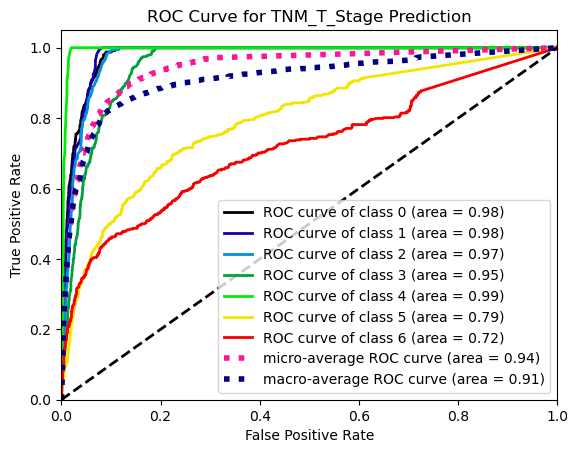

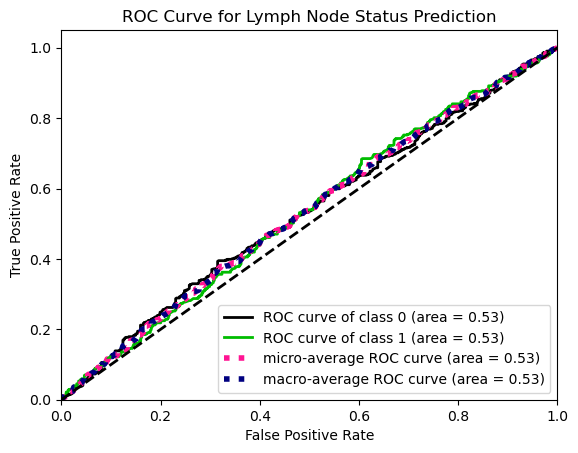

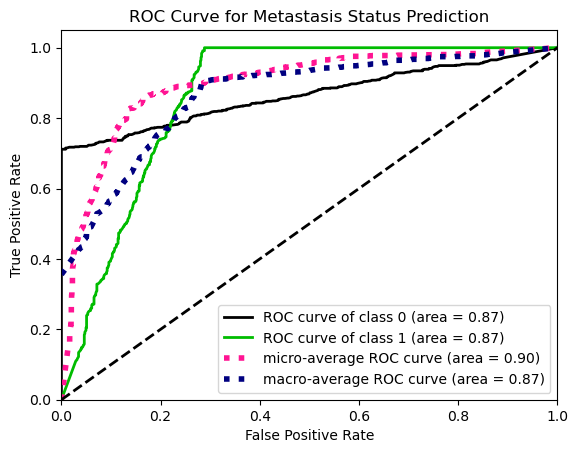

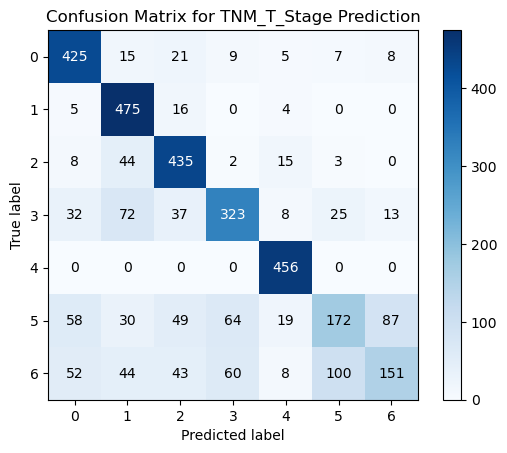

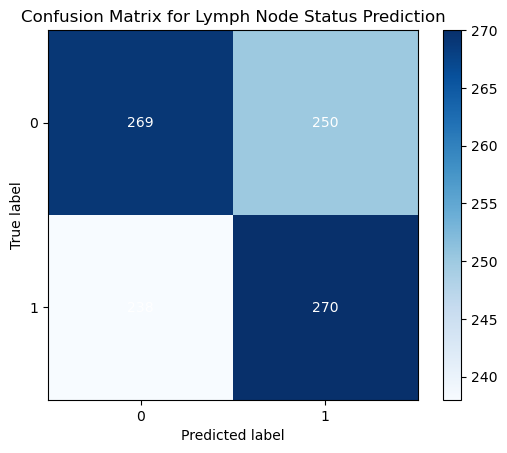

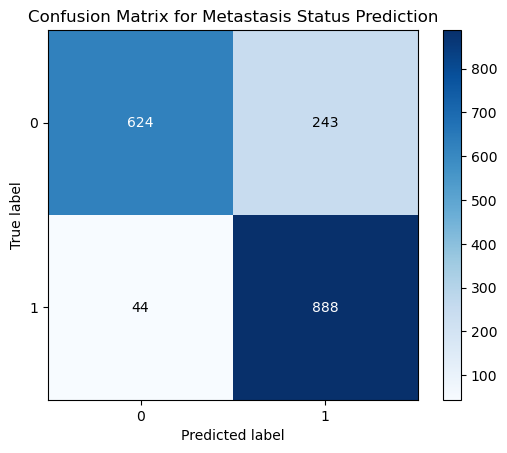

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt


# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation']]

# Make sure the target variables are 1D arrays
y_TNM_T_Stage = dataset['TNM_T_Stage'].values.ravel()  # or .to_numpy().ravel()
y_lymph_node_status = dataset['Lymph_Node_Status'].values.ravel()
y_metastasis = dataset['Metastasis_Status'].values.ravel()

ros_ts = RandomOverSampler(random_state=0)
X_resampled_ts, y_TNM_T_Stage_resampled = ros_ts.fit_resample(X, y_TNM_T_Stage)

ros_ln = RandomOverSampler(random_state=0)
X_resampled_ln, y_lymph_node_status_resampled = ros_ln.fit_resample(X, y_lymph_node_status)

ros_ms = RandomOverSampler(random_state=0)
X_resampled_ms, y_metastasis_resampled = ros_ms.fit_resample(X, y_metastasis)

# 2. Data Splitting
X_trainval_ts, X_test_ts, y_trainval_ts, y_test_ts = train_test_split(X_resampled_ts, y_TNM_T_Stage_resampled, test_size=0.2, random_state=0)
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_trainval_ts, y_trainval_ts, test_size=0.25, random_state=0)

X_trainval_ln, X_test_ln, y_trainval_ln, y_test_ln = train_test_split(X_resampled_ln, y_lymph_node_status_resampled, test_size=0.2, random_state=0)
X_train_ln, X_val_ln, y_train_ln, y_val_ln = train_test_split(X_trainval_ln, y_trainval_ln, test_size=0.25, random_state=0)

X_trainval_ms, X_test_ms, y_trainval_ms, y_test_ms = train_test_split(X_resampled_ms, y_metastasis_resampled, test_size=0.2, random_state=0)
X_train_ms, X_val_ms, y_train_ms, y_val_ms = train_test_split(X_trainval_ms, y_trainval_ms, test_size=0.25, random_state=0)

# 3. Model Selection and Training
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

rf_classifier_ts = RandomForestClassifier(random_state=0)
rf_classifier_ln = RandomForestClassifier(random_state=0)
rf_classifier_ms = RandomForestClassifier(random_state=0)

random_search_ts = RandomizedSearchCV(estimator=rf_classifier_ts, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_ln = RandomizedSearchCV(estimator=rf_classifier_ln, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_ms = RandomizedSearchCV(estimator=rf_classifier_ms, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

random_search_ts.fit(X_trainval_ts, y_trainval_ts)
random_search_ln.fit(X_trainval_ln, y_trainval_ln)
random_search_ms.fit(X_trainval_ms, y_trainval_ms)

best_rf_classifier_ts = random_search_ts.best_estimator_
best_rf_classifier_ln = random_search_ln.best_estimator_
best_rf_classifier_ms = random_search_ms.best_estimator_

y_pred_val_ts = best_rf_classifier_ts.predict(X_val_ts)
y_pred_val_ln = best_rf_classifier_ln.predict(X_val_ln)
y_pred_val_ms = best_rf_classifier_ms.predict(X_val_ms)

accuracy_val_ts = accuracy_score(y_val_ts, y_pred_val_ts)
accuracy_val_ln = accuracy_score(y_val_ln, y_pred_val_ln)
accuracy_val_ms = accuracy_score(y_val_ms, y_pred_val_ms)
print("Validation Accuracy for TNM_T_Stage:", accuracy_val_ts)
print("Validation Accuracy for Lymph Node Status:", accuracy_val_ln)
print("Validation Accuracy for Metastasis Status:", accuracy_val_ms)

y_pred_test_ts = best_rf_classifier_ts.predict(X_test_ts)
y_pred_test_ln = best_rf_classifier_ln.predict(X_test_ln)
y_pred_test_ms = best_rf_classifier_ms.predict(X_test_ms)

accuracy_test_ts = accuracy_score(y_test_ts, y_pred_test_ts)
accuracy_test_ln = accuracy_score(y_test_ln, y_pred_test_ln)
accuracy_test_ms = accuracy_score(y_test_ms, y_pred_test_ms)

print("Test Accuracy for TNM_T_Stage:", accuracy_test_ts)
print("Test Accuracy for Lymph Node Status:", accuracy_test_ln)
print("Test Accuracy for Metastasis Status:", accuracy_test_ms)

# 4. Results Presentation
results_ts = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_ts),
    'Training Data': pd.Series(y_trainval_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ts).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ts).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ts).reset_index(drop=True) - pd.Series(y_pred_test_ts).reset_index(drop=True)
})

results_ln = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_ln),
    'Training Data': pd.Series(y_trainval_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ln).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ln).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ln).reset_index(drop=True) - pd.Series(y_pred_test_ln).reset_index(drop=True)
})

results_ms = pd.DataFrame({
    'Type': ['Metastasis Status'] * len(y_test_ms),
    'Training Data': pd.Series(y_trainval_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ms).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ms).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ms).reset_index(drop=True) - pd.Series(y_pred_test_ms).reset_index(drop=True)
})

combined_results = pd.concat([results_ts, results_ln, results_ms], ignore_index=True)

# Calculate AUC scores
y_pred_proba_ts = best_rf_classifier_ts.predict_proba(X_test_ts)
auc_ts = roc_auc_score(y_test_ts, y_pred_proba_ts, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_ts)

# Calculate AUC score for Lymph node status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ln, y_pred_test_ln)
    print(f"AUC Score for Lymph Node Status Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ms, y_pred_test_ms)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")


# Plot ROC Curves
skplt.metrics.plot_roc(y_test_ts, y_pred_proba_ts, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

y_pred_proba_ln = best_rf_classifier_ln.predict_proba(X_test_ln)
skplt.metrics.plot_roc(y_test_ln, y_pred_proba_ln, title='ROC Curve for Lymph Node Status Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_ms = best_rf_classifier_ms.predict_proba(X_test_ms)
skplt.metrics.plot_roc(y_test_ms, y_pred_proba_ms, title='ROC Curve for Metastasis Status Prediction')
plt.show()

# Plot Confusion Matrices
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_ts, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ln, y_pred_test_ln, normalize=False, title='Confusion Matrix for Lymph Node Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ms, y_pred_test_ms, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:39:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 1         | 0.6049    | 0.7744    | 0.2174    | 7.219     | 5.904     | 155.9     | 0.8229    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:39:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 2         | 0.6743    | 0.7188    | 0.2686    | 9.746     | 4.451     | 247.9     | 0.7644    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:39:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 3         | 0.4007    | 0.784     | 0.2784    | 3.497     | 1.784     | 55.05     | 0.9163    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:39:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 4         | 0.6673    | 0.8891    | 0.2623    | 9.85      | 8.192     | 165.4     | 0.8903    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:39:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 5         | 0.4407    | 0.5591    | 0.1956    | 4.003     | 9.502     | 180.5     | 0.7073    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:40:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 6         | 0.6681    | 0.8217    | 0.3       | 10.0      | 9.979     | 254.0     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:40:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 7         | 0.6331    | 0.6554    | 0.08858   | 9.362     | 4.18      | 246.6     | 0.8107    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:40:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 8         | 0.6934    | 1.0       | 0.3       | 10.0      | 1.751     | 254.9     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:40:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 9         | 0.5246    | 1.0       | 0.3       | 3.0       | 4.919     | 253.6     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:41:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 10        | 0.5805    | 0.5       | 0.3       | 10.0      | 4.873     | 262.5     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:41:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 11        | 0.624     | 1.0       | 0.01      | 10.0      | 1.0       | 165.3     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:41:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 12        | 0.3263    | 0.5       | 0.01      | 3.0       | 10.0      | 163.8     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:41:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 13        | 0.4419    | 0.5       | 0.01      | 10.0      | 5.424     | 252.7     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:41:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 14        | 0.6958    | 1.0       | 0.3       | 10.0      | 1.0       | 256.6     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:42:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 15        | 0.6852    | 1.0       | 0.3       | 7.647     | 1.0       | 255.6     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:42:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 16        | 0.6867    | 1.0       | 0.3       | 8.433     | 3.267     | 257.7     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:42:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 17        | 0.4725    | 1.0       | 0.01      | 6.87      | 1.0       | 259.4     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:42:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 18        | 0.6828    | 1.0       | 0.3       | 10.0      | 5.114     | 166.1     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:43:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 19        | 0.6734    | 1.0       | 0.2515    | 10.0      | 5.516     | 162.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:43:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 20        | 0.6678    | 1.0       | 0.3       | 9.533     | 10.0      | 257.6     | 0.5336    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:43:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 21        | 0.5537    | 1.0       | 0.01      | 10.0      | 7.093     | 169.4     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:43:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 22        | 0.6705    | 1.0       | 0.3       | 7.967     | 6.812     | 258.1     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:43:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 23        | 0.6314    | 1.0       | 0.3       | 6.36      | 10.0      | 255.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:43:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 24        | 0.5266    | 0.5       | 0.3       | 6.747     | 10.0      | 260.8     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:44:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 25        | 0.5387    | 0.5       | 0.3       | 7.286     | 4.078     | 164.6     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:44:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:44:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:44:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy for TNM_T_Stage after Bayesian Optimization: 0.7135294117647059
Test Accuracy for Lymph Node Status  after Bayesian Optimization: 0.5296981499513145
Test Accuracy for Metastasis Status after Bayesian Optimization: 0.8365758754863813
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       490
           1       0.71      0.94      0.81       500
           2       0.73      0.86      0.79       507
           3       0.70      0.64      0.67       510
           4       0.89      1.00      0.94       456
           5       0.53      0.35      0.42       479
           6       0.55      0.32      0.41       458

    accuracy                           0.71      3400
   macro avg       0.69      0.71      0.69      3400
weighted avg       0.69      0.71      0.69      3400

              precision    recall  f1-score   support

           0       0.54      0.52      0.53       519
           1       0.52      0.54      0.53    

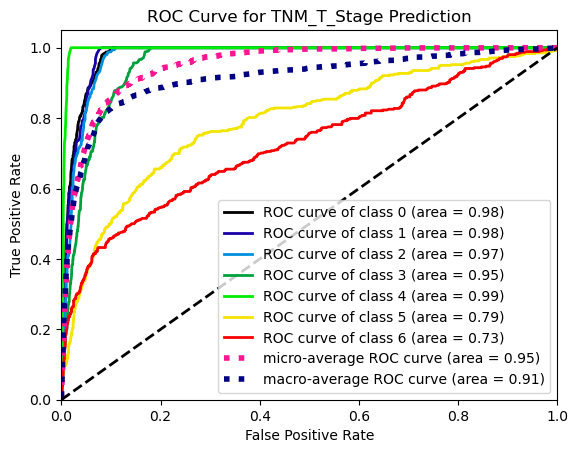

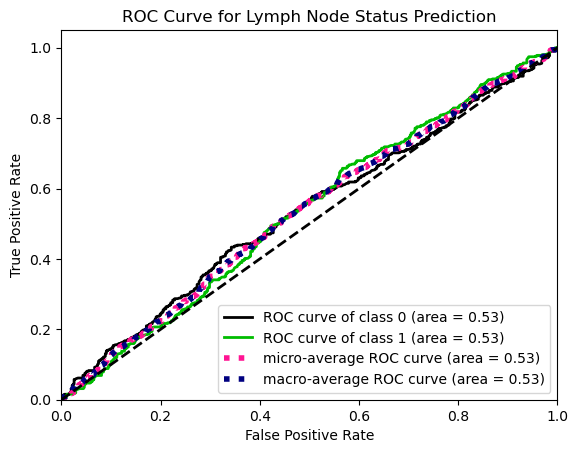

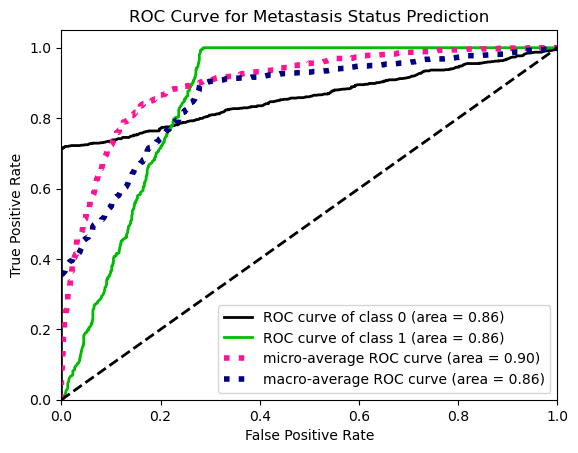

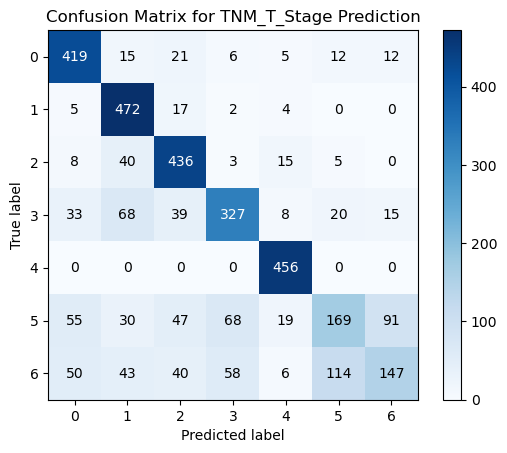

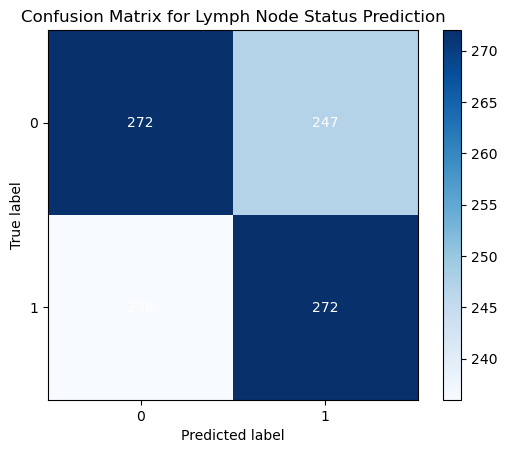

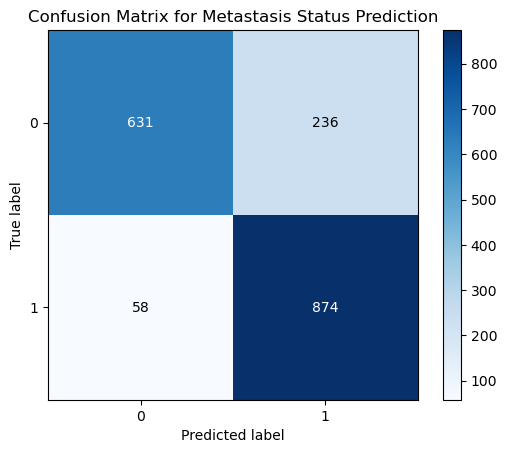

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import scikitplot as skplt  # pip install scikit-plot

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation']]

y_TNM_T_Stage = dataset['TNM_T_Stage'].values.ravel()
y_lymph_node_status = dataset['Lymph_Node_Status'].values.ravel()
y_metastasis = dataset['Metastasis_Status'].values.ravel()

# Oversampling to handle class imbalance
ros_ts = RandomOverSampler(random_state=0)
X_resampled_ts, y_TNM_T_Stage_resampled = ros_ts.fit_resample(X, y_TNM_T_Stage)

ros_ln = RandomOverSampler(random_state=0)
X_resampled_ln, y_lymph_node_status_resampled = ros_ln.fit_resample(X, y_lymph_node_status)

ros_ms = RandomOverSampler(random_state=0)
X_resampled_ms, y_metastasis_resampled = ros_ms.fit_resample(X, y_metastasis)

# Data Splitting
X_trainval_ts, X_test_ts, y_trainval_ts, y_test_ts = train_test_split(X_resampled_ts, y_TNM_T_Stage_resampled, test_size=0.2, random_state=0)
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_trainval_ts, y_trainval_ts, test_size=0.25, random_state=0)

X_trainval_ln, X_test_ln, y_trainval_ln, y_test_ln = train_test_split(X_resampled_ln, y_lymph_node_status_resampled, test_size=0.2, random_state=0)
X_train_ln, X_val_ln, y_train_ln, y_val_ln = train_test_split(X_trainval_ln, y_trainval_ln, test_size=0.25, random_state=0)

X_trainval_ms, X_test_ms, y_trainval_ms, y_test_ms = train_test_split(X_resampled_ms, y_metastasis_resampled, test_size=0.2, random_state=0)
X_train_ms, X_val_ms, y_train_ms, y_val_ms = train_test_split(X_trainval_ms, y_trainval_ms, test_size=0.25, random_state=0)

# Function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
    model = XGBClassifier(
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=0,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model.fit(X_train_ts, y_train_ts)
    y_pred_val = model.predict(X_val_ts)
    accuracy_val = accuracy_score(y_val_ts, y_pred_val)
    return accuracy_val

# Bayesian Optimization
xgb_bo = BayesianOptimization(
    f=xgb_cv, 
    pbounds={
        'max_depth': (3, 10),
        'learning_rate': (0.01, 0.3),
        'n_estimators': (50, 300),
        'min_child_weight': (1, 10),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0)
    },
    random_state=0,
    verbose=2
)
xgb_bo.maximize(init_points=5, n_iter=20)

# Extract best parameters
best_params = xgb_bo.max['params']
best_xgb_classifier_ts = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Extract best parameters
best_params = xgb_bo.max['params']
best_xgb_classifier_ln = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Extract best parameters
best_params = xgb_bo.max['params']
best_xgb_classifier_ms = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the entire training set
best_xgb_classifier_ts.fit(X_trainval_ts, y_trainval_ts)
best_xgb_classifier_ln.fit(X_trainval_ln, y_trainval_ln)
best_xgb_classifier_ms.fit(X_trainval_ms, y_trainval_ms)

# Predict and evaluate
y_pred_test_ts = best_xgb_classifier_ts.predict(X_test_ts)
accuracy_test_ts = accuracy_score(y_test_ts, y_pred_test_ts)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_ts)

# Similarly for lymph node and metastasis classifiers, you can follow the same approach
y_pred_test_ln = best_xgb_classifier_ln.predict(X_test_ln)
accuracy_test_ln = accuracy_score(y_test_ln, y_pred_test_ln)
print("Test Accuracy for Lymph Node Status  after Bayesian Optimization:", accuracy_test_ln)

y_pred_test_ms = best_xgb_classifier_ms.predict(X_test_ms)
accuracy_test_ms = accuracy_score(y_test_ms, y_pred_test_ms)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_ms)

# Classification Report
print(classification_report(y_test_ts, y_pred_test_ts))
print(classification_report(y_test_ln, y_pred_test_ln))
print(classification_report(y_test_ms, y_pred_test_ms))

# Calculate AUC scores
y_pred_proba_ts = best_xgb_classifier_ts.predict_proba(X_test_ts)
auc_ts = roc_auc_score(y_test_ts, y_pred_proba_ts, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_ts)

# Calculate AUC score for Lymph node status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ln, y_pred_test_ln)
    print(f"AUC Score for Lymph Node Status Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ms, y_pred_test_ms)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")


# Plot ROC Curves for Tumor size, lymph node Status, Metastasis Status
skplt.metrics.plot_roc(y_test_ts, y_pred_proba_ts, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

y_pred_proba_ln = best_xgb_classifier_ln.predict_proba(X_test_ln)
skplt.metrics.plot_roc(y_test_ln, y_pred_proba_ln, title='ROC Curve for Lymph Node Status Prediction')
plt.show()

y_pred_proba_ms = best_xgb_classifier_ms.predict_proba(X_test_ms)
skplt.metrics.plot_roc(y_test_ms, y_pred_proba_ms, title='ROC Curve for Metastasis Status Prediction')
plt.show()

# Plot Confusion Matrices
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_ts, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ln, y_pred_test_ln, normalize=False, title='Confusion Matrix for Lymph Node Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ms, y_pred_test_ms, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

# 4. Results Presentation
results_ts = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_ts),
    'Training Data': pd.Series(y_trainval_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ts).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ts).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ts).reset_index(drop=True) - pd.Series(y_pred_test_ts).reset_index(drop=True)
})

results_ln = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_ln),
    'Training Data': pd.Series(y_trainval_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ln).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ln).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ln).reset_index(drop=True) - pd.Series(y_pred_test_ln).reset_index(drop=True)
})

results_ms = pd.DataFrame({
    'Type': ['Metastasis Status'] * len(y_test_ms),
    'Training Data': pd.Series(y_trainval_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ms).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ms).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ms).reset_index(drop=True) - pd.Series(y_pred_test_ms).reset_index(drop=True)
})

combined_results = pd.concat([results_ts, results_ln, results_ms], ignore_index=True)
combined_results.head()

# Save the data to a new CSV file (optional)
combined_results.to_csv('XGB4_combined_TNM_result.csv', index=False)


In [54]:
combined_results.head()

,Type,Training Data,Validation Data,Actual Test Data,Predicted Test Data,Test Error
0,TNM_T_Stage,6,5.0,4,4,0
1,TNM_T_Stage,5,2.0,3,3,0
2,TNM_T_Stage,1,6.0,1,2,-1
3,TNM_T_Stage,6,4.0,6,5,1
4,TNM_T_Stage,6,1.0,2,2,0


In [55]:
from sklearn.model_selection import cross_val_score

# Evaluate the cross-validation performance of the best models
cv_scores_ts = cross_val_score(best_xgb_classifier_ts, X_resampled_ts, y_TNM_T_Stage_resampled, cv=5)
cv_scores_ln = cross_val_score(best_xgb_classifier_ln, X_resampled_ln, y_lymph_node_status_resampled, cv=5)
cv_scores_ms = cross_val_score(best_xgb_classifier_ms, X_resampled_ms, y_metastasis_resampled, cv=5)

print(f"TNM_T_Stage Cross-Validation Accuracy: {cv_scores_ts.mean():.4f}")
print(f"Lymph Node Status Cross-Validation Accuracy: {cv_scores_ln.mean():.4f}")
print(f"Metastasis Status Cross-Validation Accuracy: {cv_scores_ms.mean():.4f}")


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:42:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:42:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:42:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

TNM_T_Stage Cross-Validation Accuracy: 0.7072
Lymph Node Status Cross-Validation Accuracy: 0.5125
Metastasis Status Cross-Validation Accuracy: 0.8518


In [56]:
import pandas as pd

y_cancer_stage= dataset['Cancer_Stage'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)
X_resampled_cs, y_cs_resampled = ros_cs.fit_resample(X, y_cancer_stage)

# Data Splitting
X_trainval_cs, X_test_cs, y_trainval_cs, y_test_cs = train_test_split(X_resampled_cs, y_cs_resampled, test_size=0.2, random_state=0)
X_train_cs, X_val_cs, y_train_cs, y_val_cs = train_test_split(X_trainval_cs, y_trainval_cs, test_size=0.25, random_state=0)

# Ensure y_pred_test_* and y_test_cs have the same length
min_length = min(len(y_pred_test_ts), len(y_pred_test_ln), len(y_pred_test_ms), len(y_test_cs))

# Initialize lists to store predicted and actual cancer stages
predicted_stages = []
actual_stages = []

# Loop through the predicted TNM values and match with dataset stages
for i in range(min_length):
    try:
        # Filter dataset based on predicted TNM values
        match = dataset[
            (dataset['TNM_T_Stage'] == y_pred_test_ts[i]) &
            (dataset['Lymph_Node_Status'] == y_pred_test_ln[i]) &
            (dataset['Metastasis_Status'] == y_pred_test_ms[i])
        ]

        # Check if there's a match and retrieve the cancer stage
        if not match.empty and match['Cancer_Stage'].values.size > 0:
            cancer_stage = match['Cancer_Stage'].values[0]  # Get the cancer stage
        else:
            cancer_stage = None  # No match found

        predicted_stages.append(cancer_stage)  # Store predicted stage
        actual_stages.append(y_test_cs[i])  # Store actual stage

    except IndexError as e:
        print(f"Index error at iteration {i}: {e}")
        predicted_stages.append(None)
        actual_stages.append(None)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Predicted Cancer Stage': predicted_stages,
    'Actual Test Cancer Stage': actual_stages
})

# Display the first few rows for verification
print(comparison_df.head())

# Save the results to a CSV file (optional)
comparison_df.to_csv('XGB4_cancer_stages_from_predicted_TNM_results.csv', index=False)


   Predicted Cancer Stage  Actual Test Cancer Stage
0                       4                         0
1                       1                         3
2                       2                         3
3                       4                         3
4                       4                         4


xgboost_Accuracy: 0.1889
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.15      0.16       206
           1       0.18      0.12      0.14       205
           2       0.16      0.14      0.15       192
           3       0.05      0.00      0.01       215
           4       0.21      0.53      0.30       209

    accuracy                           0.19      1027
   macro avg       0.16      0.19      0.15      1027
weighted avg       0.15      0.19      0.15      1027

Confusion Matrix:
[[ 31  34  39   6  96]
 [ 33  24  34   4 110]
 [ 37  31  27   6  91]
 [ 36  23  33   1 122]
 [ 43  21  32   2 111]]


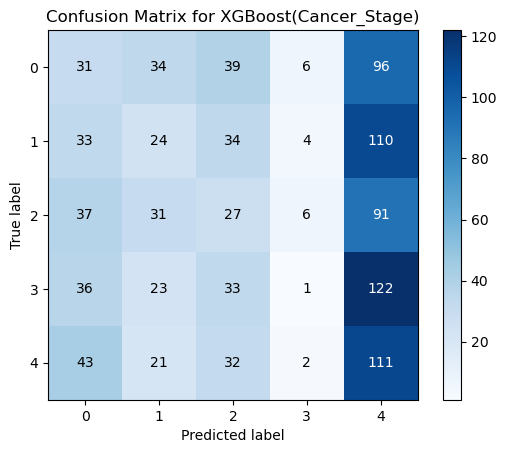

Average AUC Score: 0.4930


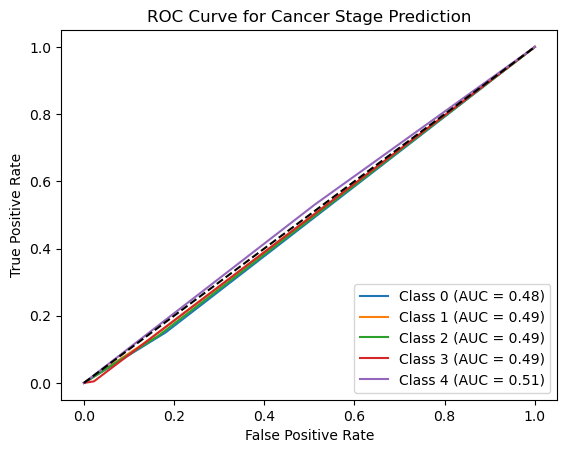

In [57]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'])
print(f"xgboost_Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage']))

# Print confusion matrix
conf_matrix = confusion_matrix(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'])
print("Confusion Matrix:")
print(conf_matrix)
# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'], normalize=False, title='Confusion Matrix for XGBoost(Cancer_Stage)')
plt.show()


# Binarize the cancer stages for AUC and ROC curve (One-vs-Rest approach)
unique_classes = np.unique(comparison_df['Actual Test Cancer Stage'])
y_true_bin = label_binarize(comparison_df['Actual Test Cancer Stage'], classes=unique_classes)
y_pred_bin = label_binarize(comparison_df['Predicted Cancer Stage'], classes=unique_classes)

# Calculate AUC score for each class
auc_scores = []
for i in range(y_true_bin.shape[1]):
    auc = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])
    auc_scores.append(auc)
    # Calculate ROC curve points
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(fpr, tpr, label=f"Class {unique_classes[i]} (AUC = {auc:.2f})")

# Calculate and print average AUC
avg_auc = np.mean(auc_scores)
print(f"Average AUC Score: {avg_auc:.4f}")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cancer Stage Prediction')
plt.legend(loc='lower right')
plt.show()


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.6749    | 31.95     | 0.7437    | 2.808     | 6.359     | 269.5     |
| 2         | 0.6634    | 35.84     | 0.4938    | 3.675     | 9.709     | 253.4     |
| 3         | 0.6658    | 41.67     | 0.576     | 2.704     | 9.405     | 128.4     |
| 4         | 0.6587    | 13.49     | 0.1182    | 3.498     | 8.225     | 448.0     |
| 5         | 0.6681    | 49.14     | 0.8192    | 2.384     | 8.244     | 147.3     |
| 6         | 0.6934    | 26.3      | 0.2329    | 1.599     | 3.971     | 233.8     |
| 7         | 0.677     | 48.9      | 0.9913    | 2.908     | 3.225     | 226.1     |
| 8         | 0.6934    | 26.32     | 0.2497    | 1.616     | 3.988     | 233.8     |
| 9         | 0.6514    | 24.34     | 1.0       | 4.0       | 10.0      | 223.6     |
| 10        | 0.692     | 24.68     | 0.1       | 1.0 

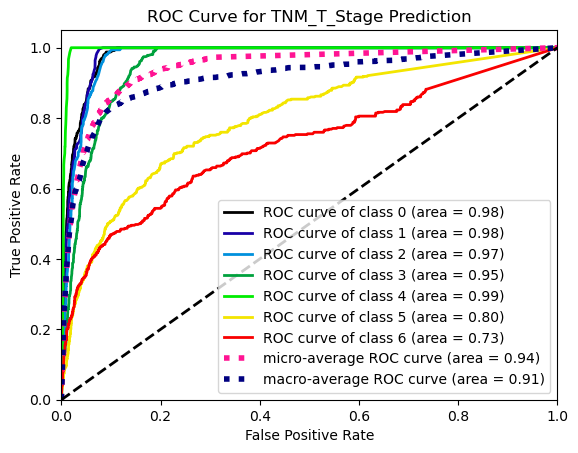

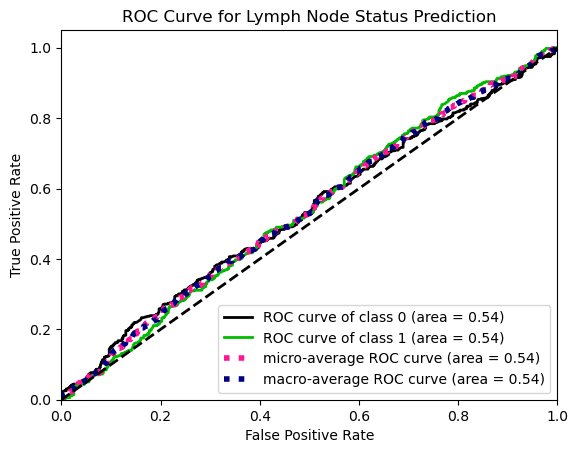

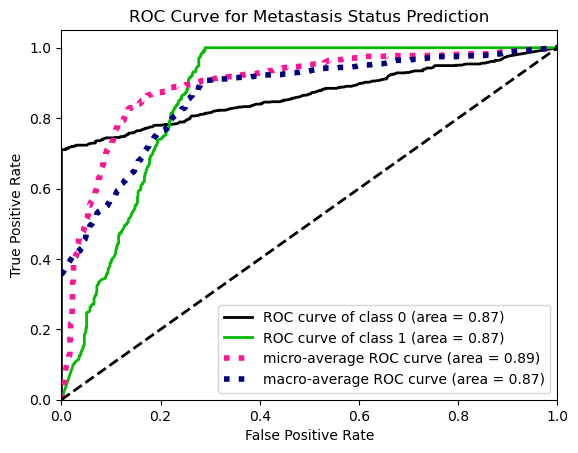

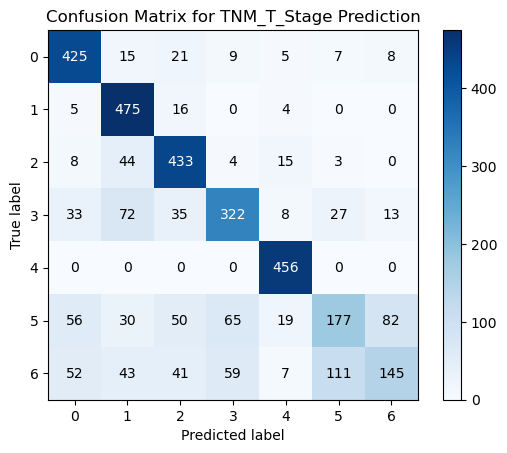

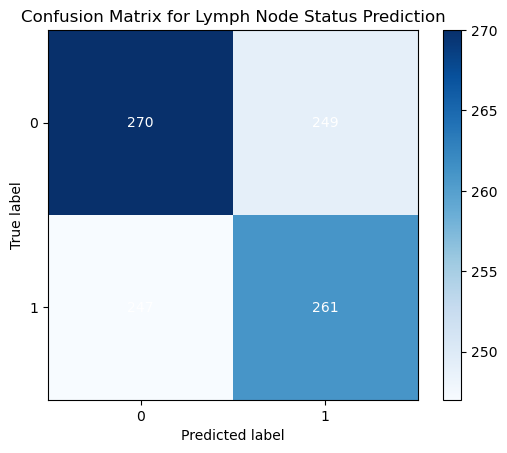

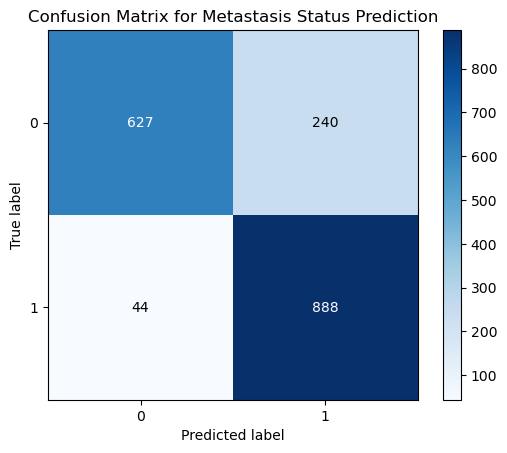

In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from bayes_opt import BayesianOptimization

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation']]

y_TNM_T_Stage = dataset['TNM_T_Stage'].values.ravel()
y_lymph_node_status = dataset['Lymph_Node_Status'].values.ravel()
y_metastasis = dataset['Metastasis_Status'].values.ravel()

# Oversampling to handle class imbalance
ros_ts = RandomOverSampler(random_state=0)
X_resampled_ts, y_TNM_T_Stage_resampled = ros_ts.fit_resample(X, y_TNM_T_Stage)

ros_ln = RandomOverSampler(random_state=0)
X_resampled_ln, y_lymph_node_status_resampled = ros_ln.fit_resample(X, y_lymph_node_status)

ros_ms = RandomOverSampler(random_state=0)
X_resampled_ms, y_metastasis_resampled = ros_ms.fit_resample(X, y_metastasis)

# Data Splitting
X_trainval_ts, X_test_ts, y_trainval_ts, y_test_ts = train_test_split(X_resampled_ts, y_TNM_T_Stage_resampled, test_size=0.2, random_state=0)
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_trainval_ts, y_trainval_ts, test_size=0.25, random_state=0)

X_trainval_ln, X_test_ln, y_trainval_ln, y_test_ln = train_test_split(X_resampled_ln, y_lymph_node_status_resampled, test_size=0.2, random_state=0)
X_train_ln, X_val_ln, y_train_ln, y_val_ln = train_test_split(X_trainval_ln, y_trainval_ln, test_size=0.25, random_state=0)

X_trainval_ms, X_test_ms, y_trainval_ms, y_test_ms = train_test_split(X_resampled_ms, y_metastasis_resampled, test_size=0.2, random_state=0)
X_train_ms, X_val_ms, y_train_ms, y_val_ms = train_test_split(X_trainval_ms, y_trainval_ms, test_size=0.25, random_state=0)

# Function to optimize with Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    # Convert float hyperparameters to integers
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=0,
        class_weight='balanced'
    )
    
    rf_classifier.fit(X_train_ts, y_train_ts)
    y_pred_val = rf_classifier.predict(X_val_ts)
    accuracy_val = accuracy_score(y_val_ts, y_pred_val)
    
    return accuracy_val

# Bayesian Optimization
rf_bo = BayesianOptimization(
    f=rf_cv,  # The objective function we are trying to optimize
    pbounds={
        'n_estimators': (100, 500),  # Range of values to search
        'max_depth': (10, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 4),
        'max_features': (0.1, 1.0),  # Percentage of features
    },
    random_state=0,
    verbose=2
)

# Optimize the objective function
rf_bo.maximize(init_points=5, n_iter=20)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_ts = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_ln = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_ms = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)
# Fit the best model on the entire training set
best_rf_classifier_ts.fit(X_trainval_ts, y_trainval_ts)
# Fit the best model on the entire training set
best_rf_classifier_ln.fit(X_trainval_ln, y_trainval_ln)
# Fit the best model on the entire training set
best_rf_classifier_ms.fit(X_trainval_ms, y_trainval_ms)

# Predict and evaluate
y_pred_test_ts = best_rf_classifier_ts.predict(X_test_ts)
accuracy_test_ts = accuracy_score(y_test_ts, y_pred_test_ts)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_ts)

# Similarly for lymph node and metastasis classifiers, you can follow the same approach
y_pred_test_ln = best_rf_classifier_ln.predict(X_test_ln)
accuracy_test_ln = accuracy_score(y_test_ln, y_pred_test_ln)
print("Test Accuracy for Lymph Node Status  after Bayesian Optimization:", accuracy_test_ln)

y_pred_test_ms = best_rf_classifier_ms.predict(X_test_ms)
accuracy_test_ms = accuracy_score(y_test_ms, y_pred_test_ms)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_ms)

print("Classification Report:")
print(classification_report(y_test_ts, y_pred_test_ts))
print(classification_report(y_test_ln, y_pred_test_ln))
print(classification_report(y_test_ms, y_pred_test_ms))

# 4. Results Presentation
results_ts = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_ts),
    'Training Data': pd.Series(y_trainval_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ts).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ts).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ts).reset_index(drop=True) - pd.Series(y_pred_test_ts).reset_index(drop=True)
})

results_ln = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_ln),
    'Training Data': pd.Series(y_trainval_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ln).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ln).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ln).reset_index(drop=True) - pd.Series(y_pred_test_ln).reset_index(drop=True)
})

results_ms = pd.DataFrame({
    'Type': ['Metastasis Status'] * len(y_test_ms),
    'Training Data': pd.Series(y_trainval_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ms).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ms).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ms).reset_index(drop=True) - pd.Series(y_pred_test_ms).reset_index(drop=True)
})

combined_results = pd.concat([results_ts, results_ln, results_ms], ignore_index=True)

# Calculate AUC scores
y_pred_proba_ts = best_rf_classifier_ts.predict_proba(X_test_ts)
auc_ts = roc_auc_score(y_test_ts, y_pred_proba_ts, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_ts)

# Calculate AUC score for Lymph node status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ln, y_pred_test_ln)
    print(f"AUC Score for Lymph Node Status Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ms, y_pred_test_ms)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")


# Plot ROC Curves
skplt.metrics.plot_roc(y_test_ts, y_pred_proba_ts, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

y_pred_proba_ln = best_rf_classifier_ln.predict_proba(X_test_ln)
skplt.metrics.plot_roc(y_test_ln, y_pred_proba_ln, title='ROC Curve for Lymph Node Status Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_ms = best_rf_classifier_ms.predict_proba(X_test_ms)
skplt.metrics.plot_roc(y_test_ms, y_pred_proba_ms, title='ROC Curve for Metastasis Status Prediction')
plt.show()

# Plot Confusion Matrices
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_ts, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ln, y_pred_test_ln, normalize=False, title='Confusion Matrix for Lymph Node Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ms, y_pred_test_ms, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()


# Save the data to a new CSV file (optional)
combined_results.to_csv('RF4_combined_TNM_result.csv', index=False)


In [82]:
combined_results.head()

,Type,Training Data,Validation Data,Actual Test Data,Predicted Test Data,Test Error
0,TNM_T_Stage,6,5.0,4,4,0
1,TNM_T_Stage,5,2.0,3,3,0
2,TNM_T_Stage,1,6.0,1,2,-1
3,TNM_T_Stage,6,4.0,6,5,1
4,TNM_T_Stage,6,1.0,2,2,0


In [83]:
import pandas as pd

y_cancer_stage= dataset['Cancer_Stage'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)
X_resampled_cs, y_cs_resampled = ros_cs.fit_resample(X, y_cancer_stage)

# Data Splitting
X_trainval_cs, X_test_cs, y_trainval_cs, y_test_cs = train_test_split(X_resampled_cs, y_cs_resampled, test_size=0.2, random_state=0)
X_train_cs, X_val_cs, y_train_cs, y_val_cs = train_test_split(X_trainval_cs, y_trainval_cs, test_size=0.25, random_state=0)

# Ensure y_pred_test_* and y_test_cs have the same length
min_length = min(len(y_pred_test_ts), len(y_pred_test_ln), len(y_pred_test_ms), len(y_test_cs))

# Initialize lists to store predicted and actual cancer stages
predicted_stages = []
actual_stages = []

# Loop through the predicted TNM values and match with dataset stages
for i in range(min_length):
    try:
        # Filter dataset based on predicted TNM values
        match = dataset[
            (dataset['TNM_T_Stage'] == y_pred_test_ts[i]) &
            (dataset['Lymph_Node_Status'] == y_pred_test_ln[i]) &
            (dataset['Metastasis_Status'] == y_pred_test_ms[i])
        ]

        # Check if there's a match and retrieve the cancer stage
        if not match.empty and match['Cancer_Stage'].values.size > 0:
            cancer_stage = match['Cancer_Stage'].values[0]  # Get the cancer stage
        else:
            cancer_stage = None  # No match found

        predicted_stages.append(cancer_stage)  # Store predicted stage
        actual_stages.append(y_test_cs[i])  # Store actual stage

    except IndexError as e:
        print(f"Index error at iteration {i}: {e}")
        predicted_stages.append(None)
        actual_stages.append(None)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Predicted Cancer Stage': predicted_stages,
    'Actual Test Cancer Stage': actual_stages
})

# Display the first few rows for verification
print(comparison_df.head())

# Save the results to a CSV file (optional)
comparison_df.to_csv('RF4_cancer_stages_from_predicted_TNM_results.csv', index=False)


   Predicted Cancer Stage  Actual Test Cancer Stage
0                       4                         0
1                       1                         3
2                       2                         3
3                       4                         3
4                       4                         4


RF_Accuracy: 0.1967
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.14      0.15       206
           1       0.20      0.14      0.16       205
           2       0.19      0.15      0.17       192
           3       0.11      0.01      0.02       215
           4       0.21      0.55      0.31       209

    accuracy                           0.20      1027
   macro avg       0.17      0.20      0.16      1027
weighted avg       0.17      0.20      0.16      1027

Confusion Matrix:
[[ 29  37  33   7 100]
 [ 33  28  30   3 111]
 [ 39  29  29   5  90]
 [ 35  24  33   2 121]
 [ 43  20  30   2 114]]


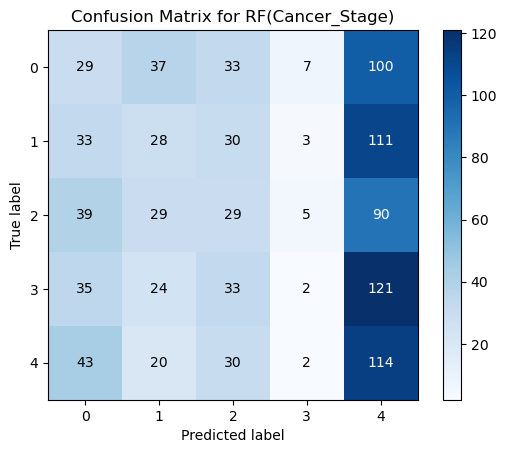

Average AUC Score: 0.4979


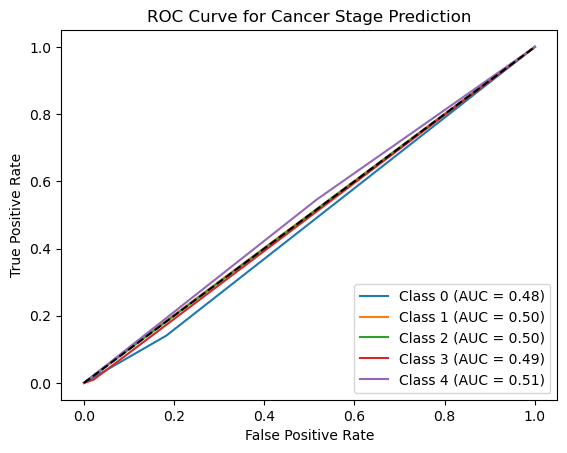

In [84]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'])
print(f"RF_Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage']))

# Print confusion matrix
conf_matrix = confusion_matrix(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'])
print("Confusion Matrix:")
print(conf_matrix)
# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'], normalize=False, title='Confusion Matrix for RF(Cancer_Stage)')
plt.show()


# Binarize the cancer stages for AUC and ROC curve (One-vs-Rest approach)
unique_classes = np.unique(comparison_df['Actual Test Cancer Stage'])
y_true_bin = label_binarize(comparison_df['Actual Test Cancer Stage'], classes=unique_classes)
y_pred_bin = label_binarize(comparison_df['Predicted Cancer Stage'], classes=unique_classes)

# Calculate AUC score for each class
auc_scores = []
for i in range(y_true_bin.shape[1]):
    auc = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])
    auc_scores.append(auc)
    # Calculate ROC curve points
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(fpr, tpr, label=f"Class {unique_classes[i]} (AUC = {auc:.2f})")

# Calculate and print average AUC
avg_auc = np.mean(auc_scores)
print(f"Average AUC Score: {avg_auc:.4f}")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cancer Stage Prediction')
plt.legend(loc='lower right')
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Validation Accuracy for Tumor Size: 0.7655192703736393
Validation Accuracy for Lymph Node Status: 0.7030185004868549
Validation Accuracy for Metastasis Status: 0.868260144524736
Test Accuracy for Tumor Size: 0.72
Test Accuracy for Lymph Node Status: 0.5209347614410905
Test Accuracy for Metastasis Status: 0.8343524180100056
AUC Score for TNM_T_Stage Prediction: 0.9139279924370697
AUC Score for Lymph Node Status Status Prediction: 0.5201079453218638
AUC Score for Metastasis Status Prediction: 0.830717139165689


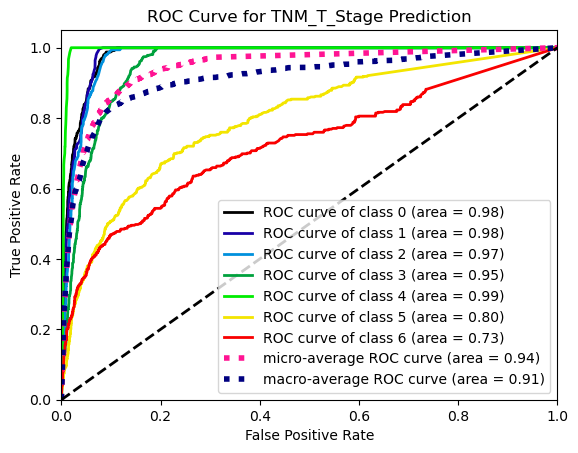

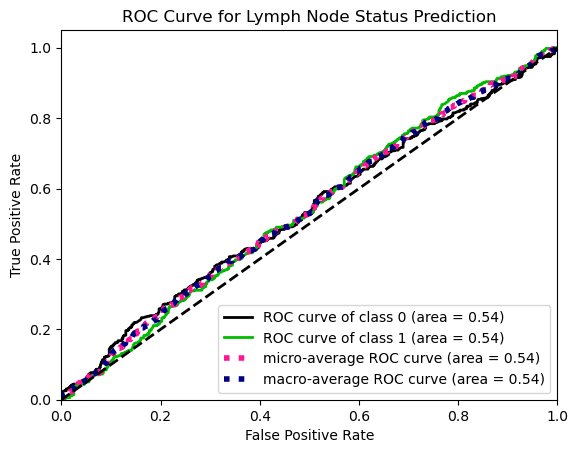

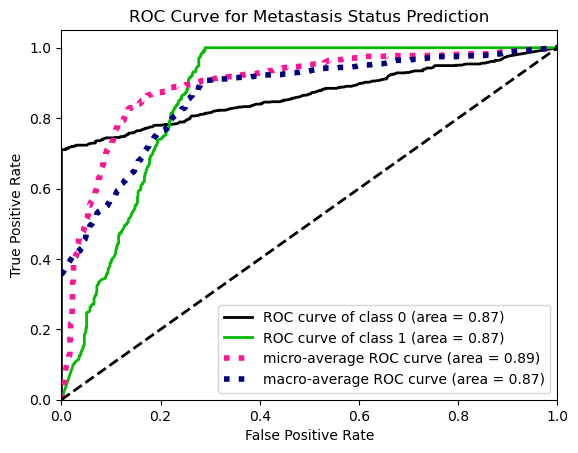

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       490
           1       0.70      0.95      0.80       500
           2       0.73      0.85      0.78       507
           3       0.71      0.65      0.68       510
           4       0.89      1.00      0.94       456
           5       0.57      0.39      0.46       479
           6       0.61      0.28      0.38       458

    accuracy                           0.72      3400
   macro avg       0.70      0.72      0.69      3400
weighted avg       0.70      0.72      0.70      3400

              precision    recall  f1-score   support

           0       0.52      0.60      0.56       519
           1       0.52      0.44      0.48       508

    accuracy                           0.52      1027
   macro avg       0.52      0.52      0.52      1027
weighted avg       0.52      0.52      0.52      1027

              precision    recall  f1-score   support

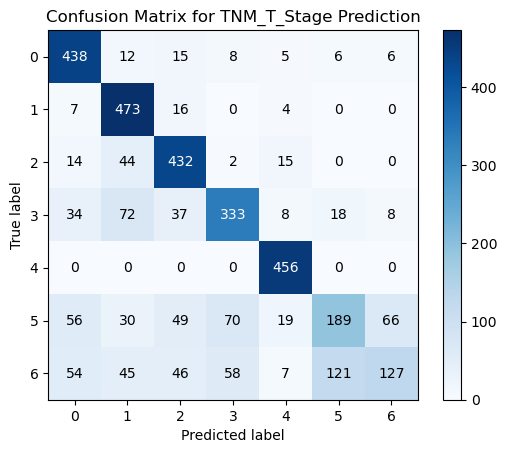

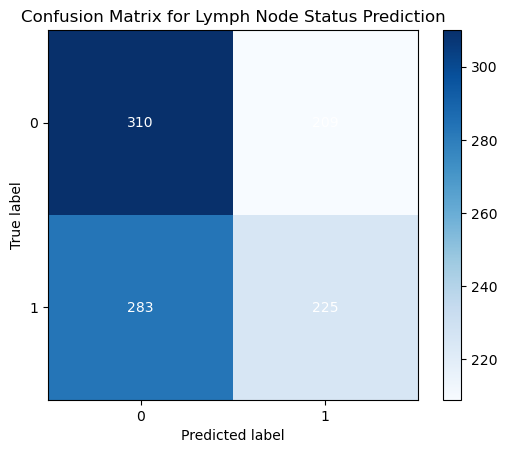

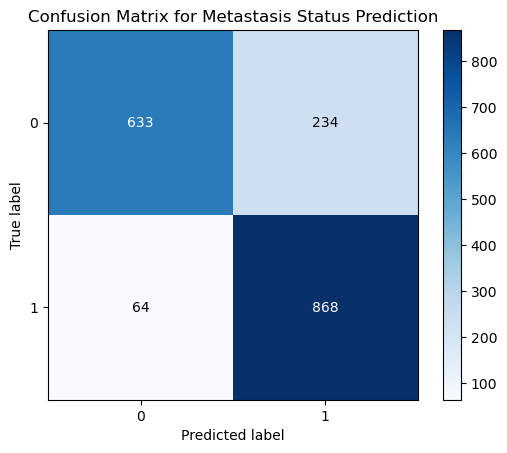

                   Type  Training Data  Validation Data  Actual Test Data  \
0           TNM_T_Stage              6              5.0                 4   
1           TNM_T_Stage              5              2.0                 3   
2           TNM_T_Stage              1              6.0                 1   
3           TNM_T_Stage              6              4.0                 6   
4           TNM_T_Stage              6              1.0                 2   
...                 ...            ...              ...               ...   
6221  Metastasis Status              0              1.0                 0   
6222  Metastasis Status              0              0.0                 0   
6223  Metastasis Status              1              1.0                 0   
6224  Metastasis Status              0              0.0                 1   
6225  Metastasis Status              0              1.0                 0   

      Predicted Test Data  Test Error  
0                       4          

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation']]

y_TNM_T_Stage = dataset['TNM_T_Stage'].values.ravel()
y_lymph_node_status = dataset['Lymph_Node_Status'].values.ravel()
y_metastasis = dataset['Metastasis_Status'].values.ravel()

# Oversampling to handle class imbalance
ros_ts = RandomOverSampler(random_state=0)
X_resampled_ts, y_TNM_T_Stage_resampled = ros_ts.fit_resample(X, y_TNM_T_Stage)

ros_ln = RandomOverSampler(random_state=0)
X_resampled_ln, y_lymph_node_status_resampled = ros_ln.fit_resample(X, y_lymph_node_status)

ros_ms = RandomOverSampler(random_state=0)
X_resampled_ms, y_metastasis_resampled = ros_ms.fit_resample(X, y_metastasis)

# 2. Data Splitting
X_trainval_ts, X_test_ts, y_trainval_ts, y_test_ts = train_test_split(X_resampled_ts, y_TNM_T_Stage_resampled, test_size=0.2, random_state=0)
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_trainval_ts, y_trainval_ts, test_size=0.25, random_state=0)

X_trainval_ln, X_test_ln, y_trainval_ln, y_test_ln = train_test_split(X_resampled_ln, y_lymph_node_status_resampled, test_size=0.2, random_state=0)
X_train_ln, X_val_ln, y_train_ln, y_val_ln = train_test_split(X_trainval_ln, y_trainval_ln, test_size=0.25, random_state=0)

X_trainval_ms, X_test_ms, y_trainval_ms, y_test_ms = train_test_split(X_resampled_ms, y_metastasis_resampled, test_size=0.2, random_state=0)
X_train_ms, X_val_ms, y_train_ms, y_val_ms = train_test_split(X_trainval_ms, y_trainval_ms, test_size=0.25, random_state=0)

# 3. Model Selection and Training
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_classifier_ts = DecisionTreeClassifier(random_state=0)
dt_classifier_ln = DecisionTreeClassifier(random_state=0)
dt_classifier_ms = DecisionTreeClassifier(random_state=0)

random_search_ts = RandomizedSearchCV(estimator=dt_classifier_ts, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_ln = RandomizedSearchCV(estimator=dt_classifier_ln, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_ms = RandomizedSearchCV(estimator=dt_classifier_ms, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

random_search_ts.fit(X_trainval_ts, y_trainval_ts)
random_search_ln.fit(X_trainval_ln, y_trainval_ln)
random_search_ms.fit(X_trainval_ms, y_trainval_ms)

best_dt_classifier_ts = random_search_ts.best_estimator_
best_dt_classifier_ln = random_search_ln.best_estimator_
best_dt_classifier_ms = random_search_ms.best_estimator_

y_pred_val_ts = best_dt_classifier_ts.predict(X_val_ts)
y_pred_val_ln = best_dt_classifier_ln.predict(X_val_ln)
y_pred_val_ms = best_dt_classifier_ms.predict(X_val_ms)

accuracy_val_ts = accuracy_score(y_val_ts, y_pred_val_ts)
accuracy_val_ln = accuracy_score(y_val_ln, y_pred_val_ln)
accuracy_val_ms = accuracy_score(y_val_ms, y_pred_val_ms)
print("Validation Accuracy for Tumor Size:", accuracy_val_ts)
print("Validation Accuracy for Lymph Node Status:", accuracy_val_ln)
print("Validation Accuracy for Metastasis Status:", accuracy_val_ms)

y_pred_test_ts = best_dt_classifier_ts.predict(X_test_ts)
y_pred_test_ln = best_dt_classifier_ln.predict(X_test_ln)
y_pred_test_ms = best_dt_classifier_ms.predict(X_test_ms)

accuracy_test_ts = accuracy_score(y_test_ts, y_pred_test_ts)
accuracy_test_ln = accuracy_score(y_test_ln, y_pred_test_ln)
accuracy_test_ms = accuracy_score(y_test_ms, y_pred_test_ms)

print("Test Accuracy for Tumor Size:", accuracy_test_ts)
print("Test Accuracy for Lymph Node Status:", accuracy_test_ln)
print("Test Accuracy for Metastasis Status:", accuracy_test_ms)

# 4. Results Presentation
results_ts = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_ts),
    'Training Data': pd.Series(y_trainval_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ts).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ts).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ts).reset_index(drop=True) - pd.Series(y_pred_test_ts).reset_index(drop=True)
})

results_ln = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_ln),
    'Training Data': pd.Series(y_trainval_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ln).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ln).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ln).reset_index(drop=True) - pd.Series(y_pred_test_ln).reset_index(drop=True)
})

results_ms = pd.DataFrame({
    'Type': ['Metastasis Status'] * len(y_test_ms),
    'Training Data': pd.Series(y_trainval_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ms).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ms).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ms).reset_index(drop=True) - pd.Series(y_pred_test_ms).reset_index(drop=True)
})

combined_results = pd.concat([results_ts, results_ln, results_ms], ignore_index=True)

# Calculate AUC scores
y_pred_proba_ts = best_rf_classifier_ts.predict_proba(X_test_ts)
auc_ts = roc_auc_score(y_test_ts, y_pred_proba_ts, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_ts)

# Calculate AUC score for Lymph node status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ln, y_pred_test_ln)
    print(f"AUC Score for Lymph Node Status Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ms, y_pred_test_ms)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Plot ROC Curves
skplt.metrics.plot_roc(y_test_ts, y_pred_proba_ts, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_ln, y_pred_proba_ln, title='ROC Curve for Lymph Node Status Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_ms = best_rf_classifier_ms.predict_proba(X_test_ms)
skplt.metrics.plot_roc(y_test_ms, y_pred_proba_ms, title='ROC Curve for Metastasis Status Prediction')
plt.show()

print("Classification Report:")
print(classification_report(y_test_ts, y_pred_test_ts))
print(classification_report(y_test_ln, y_pred_test_ln))
print(classification_report(y_test_ms, y_pred_test_ms))

# Plot Confusion Matrices
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_ts, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ln, y_pred_test_ln, normalize=False, title='Confusion Matrix for Lymph Node Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ms, y_pred_test_ms, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

# Print combined results
print(combined_results)

# Save the data to a new CSV file (optional)
combined_results.to_csv('DT4_combined_TNM_result.csv', index=False)


In [63]:
import pandas as pd

y_cancer_stage= dataset['Cancer_Stage'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)
X_resampled_cs, y_cs_resampled = ros_cs.fit_resample(X, y_cancer_stage)

# Data Splitting
X_trainval_cs, X_test_cs, y_trainval_cs, y_test_cs = train_test_split(X_resampled_cs, y_cs_resampled, test_size=0.2, random_state=0)
X_train_cs, X_val_cs, y_train_cs, y_val_cs = train_test_split(X_trainval_cs, y_trainval_cs, test_size=0.25, random_state=0)

# Ensure y_pred_test_* and y_test_cs have the same length
min_length = min(len(y_pred_test_ts), len(y_pred_test_ln), len(y_pred_test_ms), len(y_test_cs))

# Initialize lists to store predicted and actual cancer stages
predicted_stages = []
actual_stages = []

# Loop through the predicted TNM values and match with dataset stages
for i in range(min_length):
    try:
        # Filter dataset based on predicted TNM values
        match = dataset[
            (dataset['TNM_T_Stage'] == y_pred_test_ts[i]) &
            (dataset['Lymph_Node_Status'] == y_pred_test_ln[i]) &
            (dataset['Metastasis_Status'] == y_pred_test_ms[i])
        ]

        # Check if there's a match and retrieve the cancer stage
        if not match.empty and match['Cancer_Stage'].values.size > 0:
            cancer_stage = match['Cancer_Stage'].values[0]  # Get the cancer stage
        else:
            cancer_stage = None  # No match found

        predicted_stages.append(cancer_stage)  # Store predicted stage
        actual_stages.append(y_test_cs[i])  # Store actual stage

    except IndexError as e:
        print(f"Index error at iteration {i}: {e}")
        predicted_stages.append(None)
        actual_stages.append(None)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Predicted Cancer Stage': predicted_stages,
    'Actual Test Cancer Stage': actual_stages
})

# Display the first few rows for verification
print(comparison_df.head())

# Save the results to a CSV file (optional)
comparison_df.to_csv('DT4_cancer_stages_from_predicted_TNM_results.csv', index=False)


   Predicted Cancer Stage  Actual Test Cancer Stage
0                       4                         0
1                       1                         3
2                       2                         3
3                       4                         3
4                       4                         4


DT_Accuracy: 0.1996
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.16      0.16       206
           1       0.20      0.16      0.18       205
           2       0.20      0.15      0.17       192
           3       0.10      0.01      0.02       215
           4       0.21      0.53      0.30       209

    accuracy                           0.20      1027
   macro avg       0.18      0.20      0.17      1027
weighted avg       0.18      0.20      0.17      1027

Confusion Matrix:
[[ 32  41  30   7  96]
 [ 35  33  27   3 107]
 [ 40  30  28   4  90]
 [ 39  29  30   2 115]
 [ 43  29  22   5 110]]


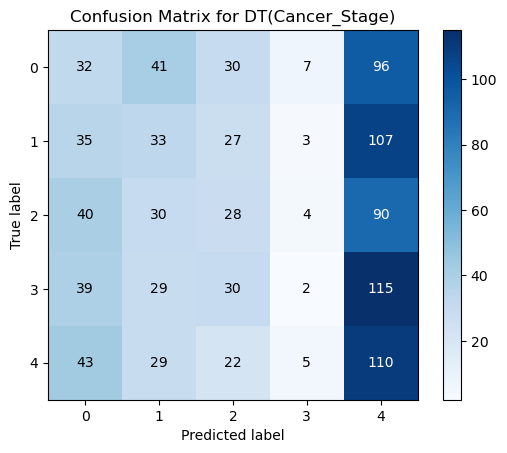

Average AUC Score: 0.4997


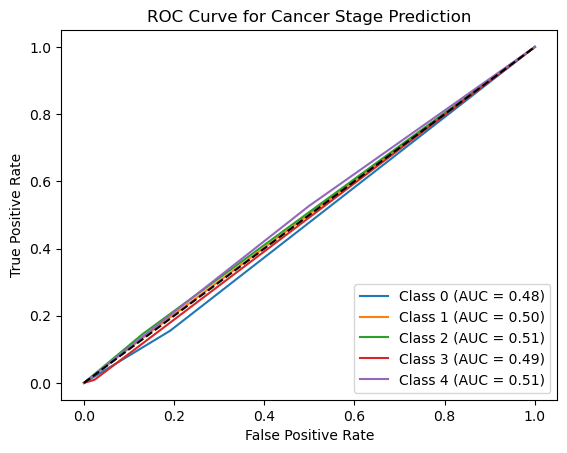

In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'])
print(f"DT_Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage']))

# Print confusion matrix
conf_matrix = confusion_matrix(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'])
print("Confusion Matrix:")
print(conf_matrix)
# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'], normalize=False, title='Confusion Matrix for DT(Cancer_Stage)')
plt.show()

# Binarize the cancer stages for AUC and ROC curve (One-vs-Rest approach)
unique_classes = np.unique(comparison_df['Actual Test Cancer Stage'])
y_true_bin = label_binarize(comparison_df['Actual Test Cancer Stage'], classes=unique_classes)
y_pred_bin = label_binarize(comparison_df['Predicted Cancer Stage'], classes=unique_classes)

# Calculate AUC score for each class
auc_scores = []
for i in range(y_true_bin.shape[1]):
    auc = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])
    auc_scores.append(auc)
    # Calculate ROC curve points
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(fpr, tpr, label=f"Class {unique_classes[i]} (AUC = {auc:.2f})")

# Calculate and print average AUC
avg_auc = np.mean(auc_scores)
print(f"Average AUC Score: {avg_auc:.4f}")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cancer Stage Prediction')
plt.legend(loc='lower right')
plt.show()


# Using Sampled dataset of size 1000 for the TNM Prediction on Cancer Stage

In [85]:
dataset.head()

,Age,Alcohol_Intake,Smoking_Status,Family_History_of_Breast_Cancer,Menopausal_Status,Tumor_Size_mm,Lymph_Node_Status,Breast_Pain,Breast_Lump,Breast_Biopsy,Genetic_Mutation,Hormone_Receptor_Status,Diagnosis_Status,Metastasis_Status,Cancer_Stage,Treatment,TNM_T_Stage
0,71,1,0,0,0,50,1,1,0,0,1,0,1,0,2,7,5
1,34,1,0,1,1,77,1,0,1,0,1,0,1,0,2,7,6
2,80,0,0,0,1,54,0,0,0,0,0,1,1,0,3,0,6
3,40,0,1,1,0,54,0,0,1,0,2,1,1,0,3,0,6
4,43,1,1,0,1,97,1,0,1,1,1,1,1,1,4,3,6


In [86]:
import pandas as pd

# Load your dataset
dataset

# Randomly sample 2000 rows from the 5000
sampled_data = dataset.sample(n=1000, random_state=42)

# Save the sampled data to a new CSV file (optional)
sampled_data.to_csv('Reduced_Modified_breast_cancer_data.csv', index=False)

# Display the first few rows of the reduced dataset
sampled_data.head()


,Age,Alcohol_Intake,Smoking_Status,Family_History_of_Breast_Cancer,Menopausal_Status,Tumor_Size_mm,Lymph_Node_Status,Breast_Pain,Breast_Lump,Breast_Biopsy,Genetic_Mutation,Hormone_Receptor_Status,Diagnosis_Status,Metastasis_Status,Cancer_Stage,Treatment,TNM_T_Stage
1501,85,0,0,1,0,97,0,1,1,1,2,0,1,0,3,1,6
2586,31,1,0,0,0,97,1,0,0,0,0,0,0,0,0,4,0
2653,63,1,0,1,1,12,1,0,1,1,2,1,1,1,4,2,3
1055,64,0,1,1,1,21,0,0,1,1,0,0,1,0,2,7,5
705,87,0,1,1,1,26,1,0,0,1,1,0,1,1,4,3,5


In [87]:
dataset = pd.read_csv('Reduced_Modified_breast_cancer_data.csv')
dataset.head()

,Age,Alcohol_Intake,Smoking_Status,Family_History_of_Breast_Cancer,Menopausal_Status,Tumor_Size_mm,Lymph_Node_Status,Breast_Pain,Breast_Lump,Breast_Biopsy,Genetic_Mutation,Hormone_Receptor_Status,Diagnosis_Status,Metastasis_Status,Cancer_Stage,Treatment,TNM_T_Stage
0,85,0,0,1,0,97,0,1,1,1,2,0,1,0,3,1,6
1,31,1,0,0,0,97,1,0,0,0,0,0,0,0,0,4,0
2,63,1,0,1,1,12,1,0,1,1,2,1,1,1,4,2,3
3,64,0,1,1,1,21,0,0,1,1,0,0,1,0,2,7,5
4,87,0,1,1,1,26,1,0,0,1,1,0,1,1,4,3,5


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:12:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 1         | 0.775     | 0.7744    | 0.2174    | 7.219     | 5.904     | 155.9     | 0.8229    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 2         | 0.82      | 0.7188    | 0.2686    | 9.746     | 4.451     | 247.9     | 0.7644    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:12:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 3         | 0.6125    | 0.784     | 0.2784    | 3.497     | 1.784     | 55.05     | 0.9163    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:12:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 4         | 0.8041    | 0.8891    | 0.2623    | 9.85      | 8.192     | 165.4     | 0.8903    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:12:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 5         | 0.6328    | 0.5591    | 0.1956    | 4.003     | 9.502     | 180.5     | 0.7073    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 6         | 0.8128    | 1.0       | 0.2352    | 4.461     | 1.0       | 255.0     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 7         | 0.7881    | 0.6562    | 0.09079   | 9.367     | 4.184     | 246.6     | 0.8101    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:12:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 8         | 0.7983    | 1.0       | 0.3       | 10.0      | 7.078     | 254.6     | 0.5313    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 9         | 0.8302    | 1.0       | 0.3       | 10.0      | 1.0       | 252.4     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 10        | 0.6938    | 0.5       | 0.3       | 3.042     | 1.0       | 266.5     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 11        | 0.7126    | 1.0       | 0.3       | 3.0       | 8.894     | 250.6     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 12        | 0.6052    | 1.0       | 0.01      | 5.319     | 1.0       | 164.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 13        | 0.7765    | 0.8202    | 0.2761    | 10.0      | 10.0      | 148.8     | 0.6804    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 14        | 0.6299    | 0.5       | 0.3       | 3.0       | 4.222     | 146.9     | 0.6806    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 15        | 0.6778    | 0.5       | 0.01      | 10.0      | 1.0       | 258.4     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 16        | 0.8229    | 1.0       | 0.3       | 6.313     | 2.123     | 250.6     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 17        | 0.7533    | 1.0       | 0.3       | 10.0      | 10.0      | 159.6     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 18        | 0.6662    | 0.5       | 0.3       | 10.0      | 10.0      | 170.4     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 19        | 0.6067    | 0.5       | 0.01      | 8.806     | 4.444     | 251.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:13:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 20        | 0.8433    | 1.0       | 0.3       | 8.636     | 1.0       | 251.7     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:14:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 21        | 0.8316    | 1.0       | 0.3       | 6.504     | 1.0       | 252.6     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:14:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 22        | 0.8374    | 1.0       | 0.3       | 8.627     | 1.0       | 249.2     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:14:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 23        | 0.7852    | 1.0       | 0.3       | 3.71      | 1.0       | 251.7     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:14:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 24        | 0.8287    | 1.0       | 0.3       | 5.987     | 1.0       | 248.0     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 25        | 0.775     | 1.0       | 0.3       | 10.0      | 9.611     | 256.7     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:14:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:14:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:14:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy for TNM_T_Stage after Bayesian Optimization: 0.818577648766328
Test Accuracy for Lymph Node Status  after Bayesian Optimization: 0.5436893203883495
Test Accuracy for Metastasis Status after Bayesian Optimization: 0.9361111111111111
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        91
           1       0.85      1.00      0.92        94
           2       0.88      1.00      0.94        95
           3       0.76      0.92      0.83       102
           4       0.97      1.00      0.99       105
           5       0.62      0.60      0.61        89
           6       0.71      0.35      0.47       113

    accuracy                           0.82       689
   macro avg       0.81      0.83      0.81       689
weighted avg       0.81      0.82      0.80       689

              precision    recall  f1-score   support

           0       0.50      0.61      0.55        94
           1       0.60      0.49      0.54     

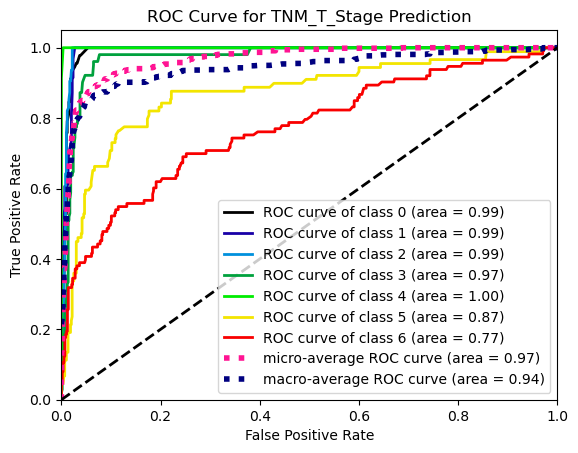

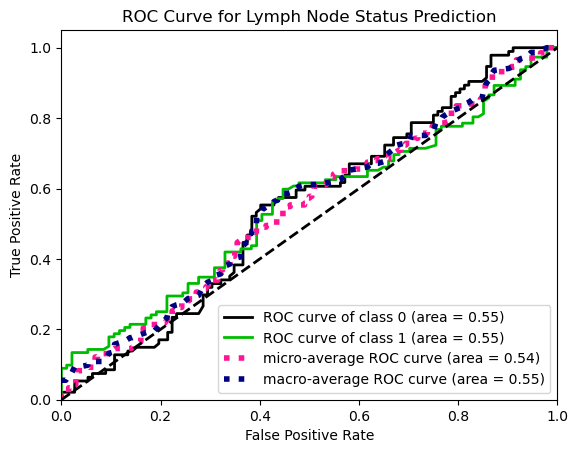

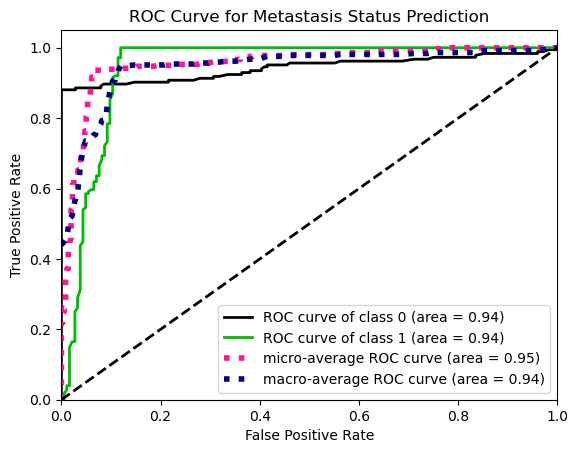

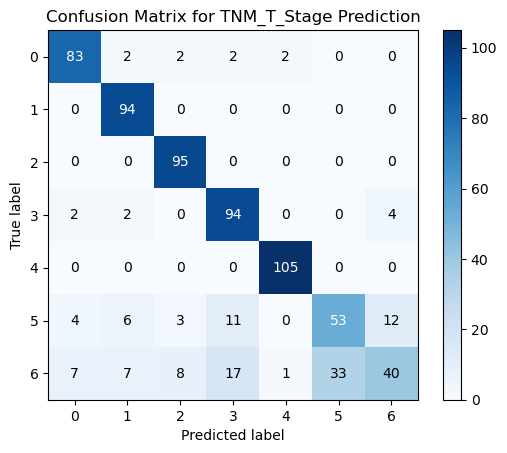

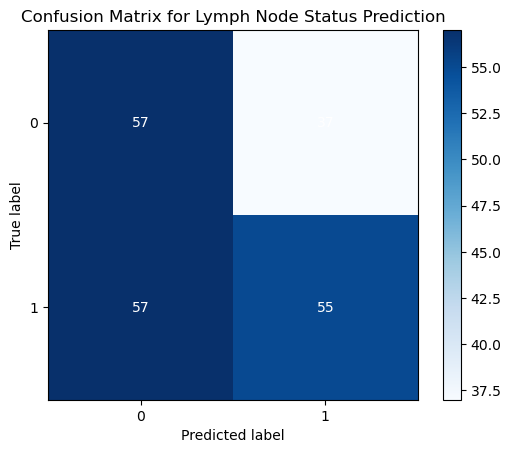

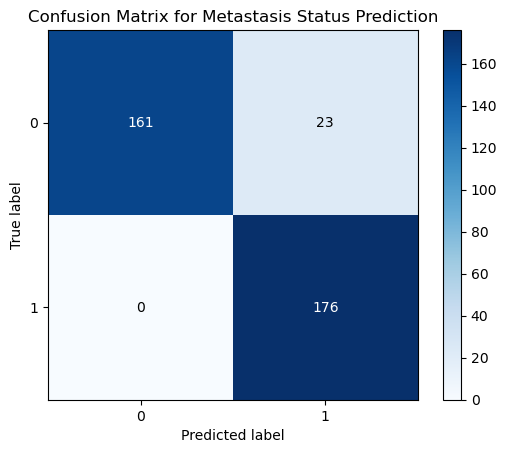

In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import scikitplot as skplt  # pip install scikit-plot

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation']]

y_TNM_T_Stage = dataset['TNM_T_Stage'].values.ravel()
y_lymph_node_status = dataset['Lymph_Node_Status'].values.ravel()
y_metastasis = dataset['Metastasis_Status'].values.ravel()

# Oversampling to handle class imbalance
ros_ts = RandomOverSampler(random_state=0)
X_resampled_ts, y_TNM_T_Stage_resampled = ros_ts.fit_resample(X, y_TNM_T_Stage)

ros_ln = RandomOverSampler(random_state=0)
X_resampled_ln, y_lymph_node_status_resampled = ros_ln.fit_resample(X, y_lymph_node_status)

ros_ms = RandomOverSampler(random_state=0)
X_resampled_ms, y_metastasis_resampled = ros_ms.fit_resample(X, y_metastasis)

# Data Splitting
X_trainval_ts, X_test_ts, y_trainval_ts, y_test_ts = train_test_split(X_resampled_ts, y_TNM_T_Stage_resampled, test_size=0.2, random_state=0)
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_trainval_ts, y_trainval_ts, test_size=0.25, random_state=0)

X_trainval_ln, X_test_ln, y_trainval_ln, y_test_ln = train_test_split(X_resampled_ln, y_lymph_node_status_resampled, test_size=0.2, random_state=0)
X_train_ln, X_val_ln, y_train_ln, y_val_ln = train_test_split(X_trainval_ln, y_trainval_ln, test_size=0.25, random_state=0)

X_trainval_ms, X_test_ms, y_trainval_ms, y_test_ms = train_test_split(X_resampled_ms, y_metastasis_resampled, test_size=0.2, random_state=0)
X_train_ms, X_val_ms, y_train_ms, y_val_ms = train_test_split(X_trainval_ms, y_trainval_ms, test_size=0.25, random_state=0)

# Function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
    model = XGBClassifier(
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=0,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model.fit(X_train_ts, y_train_ts)
    y_pred_val = model.predict(X_val_ts)
    accuracy_val = accuracy_score(y_val_ts, y_pred_val)
    return accuracy_val

# Bayesian Optimization
xgb_bo = BayesianOptimization(
    f=xgb_cv, 
    pbounds={
        'max_depth': (3, 10),
        'learning_rate': (0.01, 0.3),
        'n_estimators': (50, 300),
        'min_child_weight': (1, 10),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0)
    },
    random_state=0,
    verbose=2
)
xgb_bo.maximize(init_points=5, n_iter=20)

# Extract best parameters
best_params = xgb_bo.max['params']
best_xgb_classifier_ts = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Extract best parameters
best_params = xgb_bo.max['params']
best_xgb_classifier_ln = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Extract best parameters
best_params = xgb_bo.max['params']
best_xgb_classifier_ms = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the entire training set
best_xgb_classifier_ts.fit(X_trainval_ts, y_trainval_ts)
best_xgb_classifier_ln.fit(X_trainval_ln, y_trainval_ln)
best_xgb_classifier_ms.fit(X_trainval_ms, y_trainval_ms)

# Predict and evaluate
y_pred_test_ts = best_xgb_classifier_ts.predict(X_test_ts)
accuracy_test_ts = accuracy_score(y_test_ts, y_pred_test_ts)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_ts)

# Similarly for lymph node and metastasis classifiers, you can follow the same approach
y_pred_test_ln = best_xgb_classifier_ln.predict(X_test_ln)
accuracy_test_ln = accuracy_score(y_test_ln, y_pred_test_ln)
print("Test Accuracy for Lymph Node Status  after Bayesian Optimization:", accuracy_test_ln)

y_pred_test_ms = best_xgb_classifier_ms.predict(X_test_ms)
accuracy_test_ms = accuracy_score(y_test_ms, y_pred_test_ms)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_ms)

# Classification Report
print(classification_report(y_test_ts, y_pred_test_ts))
print(classification_report(y_test_ln, y_pred_test_ln))
print(classification_report(y_test_ms, y_pred_test_ms))

# Calculate AUC scores
y_pred_proba_ts = best_xgb_classifier_ts.predict_proba(X_test_ts)
auc_ts = roc_auc_score(y_test_ts, y_pred_proba_ts, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_ts)

# Calculate AUC score for Lymph node status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ln, y_pred_test_ln)
    print(f"AUC Score for Lymph Node Status Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ms, y_pred_test_ms)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")


# Plot ROC Curves for Tumor size, lymph node Status, Metastasis Status
skplt.metrics.plot_roc(y_test_ts, y_pred_proba_ts, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

y_pred_proba_ln = best_xgb_classifier_ln.predict_proba(X_test_ln)
skplt.metrics.plot_roc(y_test_ln, y_pred_proba_ln, title='ROC Curve for Lymph Node Status Prediction')
plt.show()

y_pred_proba_ms = best_xgb_classifier_ms.predict_proba(X_test_ms)
skplt.metrics.plot_roc(y_test_ms, y_pred_proba_ms, title='ROC Curve for Metastasis Status Prediction')
plt.show()

# Plot Confusion Matrices
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_ts, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ln, y_pred_test_ln, normalize=False, title='Confusion Matrix for Lymph Node Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ms, y_pred_test_ms, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

# 4. Results Presentation
results_ts = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_ts),
    'Training Data': pd.Series(y_trainval_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ts).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ts).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ts).reset_index(drop=True) - pd.Series(y_pred_test_ts).reset_index(drop=True)
})

results_ln = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_ln),
    'Training Data': pd.Series(y_trainval_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ln).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ln).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ln).reset_index(drop=True) - pd.Series(y_pred_test_ln).reset_index(drop=True)
})

results_ms = pd.DataFrame({
    'Type': ['Metastasis Status'] * len(y_test_ms),
    'Training Data': pd.Series(y_trainval_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ms).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ms).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ms).reset_index(drop=True) - pd.Series(y_pred_test_ms).reset_index(drop=True)
})

combined_results = pd.concat([results_ts, results_ln, results_ms], ignore_index=True)
combined_results.head()

# Save the data to a new CSV file (optional)
combined_results.to_csv('XGB4_sampled_combined_TNM_result.csv', index=False)


In [92]:
import pandas as pd

y_cancer_stage= dataset['Cancer_Stage'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)
X_resampled_cs, y_cs_resampled = ros_cs.fit_resample(X, y_cancer_stage)

# Data Splitting
X_trainval_cs, X_test_cs, y_trainval_cs, y_test_cs = train_test_split(X_resampled_cs, y_cs_resampled, test_size=0.2, random_state=0)
X_train_cs, X_val_cs, y_train_cs, y_val_cs = train_test_split(X_trainval_cs, y_trainval_cs, test_size=0.25, random_state=0)

# Ensure y_pred_test_* and y_test_cs have the same length
min_length = min(len(y_pred_test_ts), len(y_pred_test_ln), len(y_pred_test_ms), len(y_test_cs))

# Initialize lists to store predicted and actual cancer stages
predicted_stages = []
actual_stages = []

# Loop through the predicted TNM values and match with dataset stages
for i in range(min_length):
    try:
        # Filter dataset based on predicted TNM values
        match = dataset[
            (dataset['TNM_T_Stage'] == y_pred_test_ts[i]) &
            (dataset['Lymph_Node_Status'] == y_pred_test_ln[i]) &
            (dataset['Metastasis_Status'] == y_pred_test_ms[i])
        ]

        # Check if there's a match and retrieve the cancer stage
        if not match.empty and match['Cancer_Stage'].values.size > 0:
            cancer_stage = match['Cancer_Stage'].values[0]  # Get the cancer stage
        else:
            cancer_stage = None  # No match found

        predicted_stages.append(cancer_stage)  # Store predicted stage
        actual_stages.append(y_test_cs[i])  # Store actual stage

    except IndexError as e:
        print(f"Index error at iteration {i}: {e}")
        predicted_stages.append(None)
        actual_stages.append(None)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Predicted Cancer Stage': predicted_stages,
    'Actual Test Cancer Stage': actual_stages
})

# Display the first few rows for verification
print(comparison_df.head())

# Save the results to a CSV file (optional)
comparison_df.to_csv('XGB4_sampled_cancer_stages_from_predicted_TNM_results.csv', index=False)


   Predicted Cancer Stage  Actual Test Cancer Stage
0                     4.0                         3
1                     1.0                         4
2                     4.0                         0
3                     4.0                         1
4                     4.0                         4


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.7794    | 31.95     | 0.7437    | 2.808     | 6.359     | 269.5     |
| 2         | 0.7663    | 35.84     | 0.4938    | 3.675     | 9.709     | 253.4     |
| 3         | 0.7721    | 41.67     | 0.576     | 2.704     | 9.405     | 128.4     |
| 4         | 0.7518    | 13.49     | 0.1182    | 3.498     | 8.225     | 448.0     |
| 5         | 0.7678    | 49.14     | 0.8192    | 2.384     | 8.244     | 147.3     |
| 6         | 0.8215    | 26.3      | 0.2329    | 1.599     | 3.971     | 233.8     |
| 7         | 0.7794    | 48.9      | 0.9913    | 2.908     | 3.225     | 226.1     |
| 8         | 0.8186    | 49.15     | 0.7733    | 1.047     | 3.807     | 127.5     |
| 9         | 0.8215    | 26.3      | 0.2363    | 1.592     | 3.964     | 233.8     |
| 10        | 0.7576    | 23.4      | 0.1153    | 3.9 

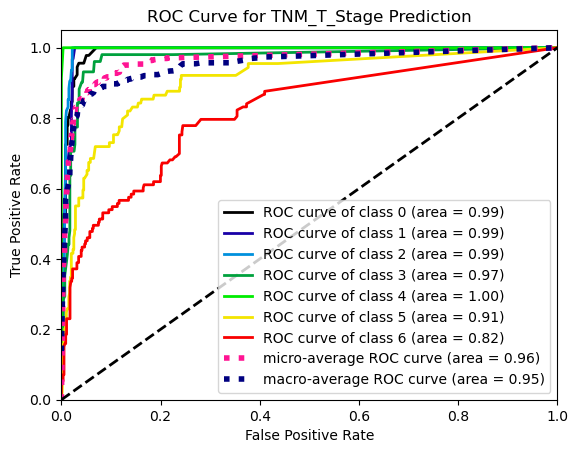

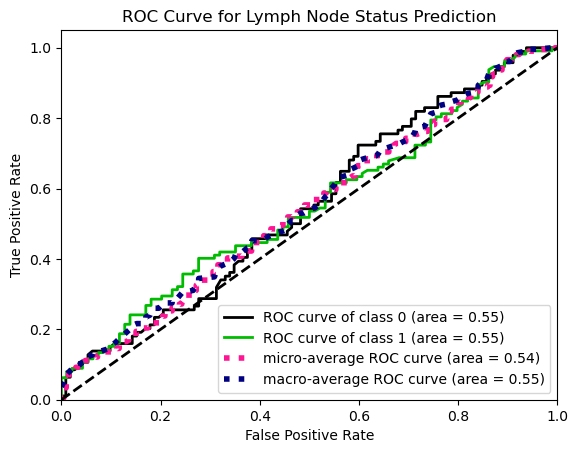

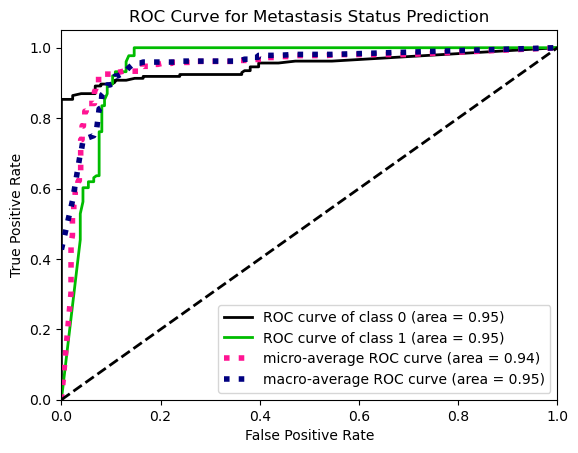

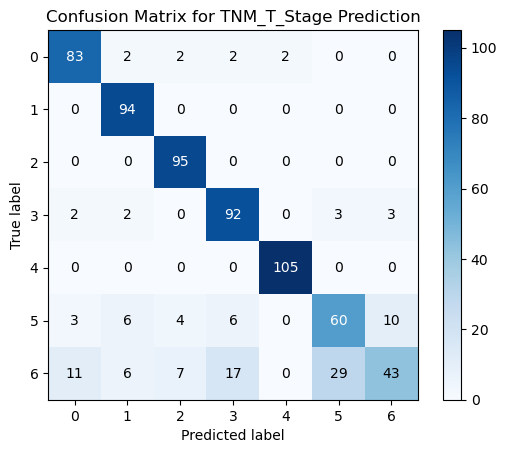

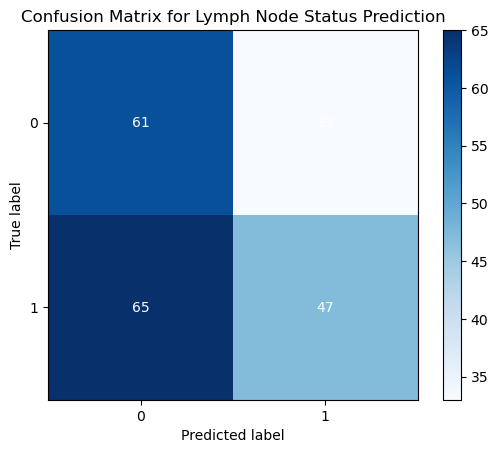

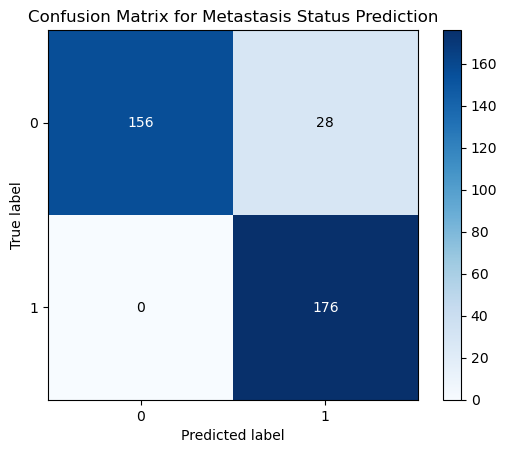

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from bayes_opt import BayesianOptimization

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation']]

y_TNM_T_Stage = dataset['TNM_T_Stage'].values.ravel()
y_lymph_node_status = dataset['Lymph_Node_Status'].values.ravel()
y_metastasis = dataset['Metastasis_Status'].values.ravel()

# Oversampling to handle class imbalance
ros_ts = RandomOverSampler(random_state=0)
X_resampled_ts, y_TNM_T_Stage_resampled = ros_ts.fit_resample(X, y_TNM_T_Stage)

ros_ln = RandomOverSampler(random_state=0)
X_resampled_ln, y_lymph_node_status_resampled = ros_ln.fit_resample(X, y_lymph_node_status)

ros_ms = RandomOverSampler(random_state=0)
X_resampled_ms, y_metastasis_resampled = ros_ms.fit_resample(X, y_metastasis)

# Data Splitting
X_trainval_ts, X_test_ts, y_trainval_ts, y_test_ts = train_test_split(X_resampled_ts, y_TNM_T_Stage_resampled, test_size=0.2, random_state=0)
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_trainval_ts, y_trainval_ts, test_size=0.25, random_state=0)

X_trainval_ln, X_test_ln, y_trainval_ln, y_test_ln = train_test_split(X_resampled_ln, y_lymph_node_status_resampled, test_size=0.2, random_state=0)
X_train_ln, X_val_ln, y_train_ln, y_val_ln = train_test_split(X_trainval_ln, y_trainval_ln, test_size=0.25, random_state=0)

X_trainval_ms, X_test_ms, y_trainval_ms, y_test_ms = train_test_split(X_resampled_ms, y_metastasis_resampled, test_size=0.2, random_state=0)
X_train_ms, X_val_ms, y_train_ms, y_val_ms = train_test_split(X_trainval_ms, y_trainval_ms, test_size=0.25, random_state=0)

# Function to optimize with Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    # Convert float hyperparameters to integers
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=0,
        class_weight='balanced'
    )
    
    rf_classifier.fit(X_train_ts, y_train_ts)
    y_pred_val = rf_classifier.predict(X_val_ts)
    accuracy_val = accuracy_score(y_val_ts, y_pred_val)
    
    return accuracy_val

# Bayesian Optimization
rf_bo = BayesianOptimization(
    f=rf_cv,  # The objective function we are trying to optimize
    pbounds={
        'n_estimators': (100, 500),  # Range of values to search
        'max_depth': (10, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 4),
        'max_features': (0.1, 1.0),  # Percentage of features
    },
    random_state=0,
    verbose=2
)

# Optimize the objective function
rf_bo.maximize(init_points=5, n_iter=20)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_ts = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_ln = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_ms = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)
# Fit the best model on the entire training set
best_rf_classifier_ts.fit(X_trainval_ts, y_trainval_ts)
# Fit the best model on the entire training set
best_rf_classifier_ln.fit(X_trainval_ln, y_trainval_ln)
# Fit the best model on the entire training set
best_rf_classifier_ms.fit(X_trainval_ms, y_trainval_ms)

# Predict and evaluate
y_pred_test_ts = best_rf_classifier_ts.predict(X_test_ts)
accuracy_test_ts = accuracy_score(y_test_ts, y_pred_test_ts)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_ts)

# Similarly for lymph node and metastasis classifiers, you can follow the same approach
y_pred_test_ln = best_rf_classifier_ln.predict(X_test_ln)
accuracy_test_ln = accuracy_score(y_test_ln, y_pred_test_ln)
print("Test Accuracy for Lymph Node Status  after Bayesian Optimization:", accuracy_test_ln)

y_pred_test_ms = best_rf_classifier_ms.predict(X_test_ms)
accuracy_test_ms = accuracy_score(y_test_ms, y_pred_test_ms)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_ms)

print("Classification Report:")
print(classification_report(y_test_ts, y_pred_test_ts))
print(classification_report(y_test_ln, y_pred_test_ln))
print(classification_report(y_test_ms, y_pred_test_ms))

# 4. Results Presentation
results_ts = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_ts),
    'Training Data': pd.Series(y_trainval_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ts).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ts).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ts).reset_index(drop=True) - pd.Series(y_pred_test_ts).reset_index(drop=True)
})

results_ln = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_ln),
    'Training Data': pd.Series(y_trainval_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ln).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ln).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ln).reset_index(drop=True) - pd.Series(y_pred_test_ln).reset_index(drop=True)
})

results_ms = pd.DataFrame({
    'Type': ['Metastasis Status'] * len(y_test_ms),
    'Training Data': pd.Series(y_trainval_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ms).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ms).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ms).reset_index(drop=True) - pd.Series(y_pred_test_ms).reset_index(drop=True)
})

combined_results = pd.concat([results_ts, results_ln, results_ms], ignore_index=True)

# Calculate AUC scores
y_pred_proba_ts = best_rf_classifier_ts.predict_proba(X_test_ts)
auc_ts = roc_auc_score(y_test_ts, y_pred_proba_ts, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_ts)

# Calculate AUC score for Lymph node status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ln, y_pred_test_ln)
    print(f"AUC Score for Lymph Node Status Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ms, y_pred_test_ms)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")


# Plot ROC Curves
skplt.metrics.plot_roc(y_test_ts, y_pred_proba_ts, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

y_pred_proba_ln = best_rf_classifier_ln.predict_proba(X_test_ln)
skplt.metrics.plot_roc(y_test_ln, y_pred_proba_ln, title='ROC Curve for Lymph Node Status Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_ms = best_rf_classifier_ms.predict_proba(X_test_ms)
skplt.metrics.plot_roc(y_test_ms, y_pred_proba_ms, title='ROC Curve for Metastasis Status Prediction')
plt.show()

# Plot Confusion Matrices
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_ts, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ln, y_pred_test_ln, normalize=False, title='Confusion Matrix for Lymph Node Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ms, y_pred_test_ms, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()


# Save the data to a new CSV file (optional)
combined_results.to_csv('RF4_sampled_combined_TNM_result.csv', index=False)


In [89]:
import pandas as pd

y_cancer_stage= dataset['Cancer_Stage'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)
X_resampled_cs, y_cs_resampled = ros_cs.fit_resample(X, y_cancer_stage)

# Data Splitting
X_trainval_cs, X_test_cs, y_trainval_cs, y_test_cs = train_test_split(X_resampled_cs, y_cs_resampled, test_size=0.2, random_state=0)
X_train_cs, X_val_cs, y_train_cs, y_val_cs = train_test_split(X_trainval_cs, y_trainval_cs, test_size=0.25, random_state=0)

# Ensure y_pred_test_* and y_test_cs have the same length
min_length = min(len(y_pred_test_ts), len(y_pred_test_ln), len(y_pred_test_ms), len(y_test_cs))

# Initialize lists to store predicted and actual cancer stages
predicted_stages = []
actual_stages = []

# Loop through the predicted TNM values and match with dataset stages
for i in range(min_length):
    try:
        # Filter dataset based on predicted TNM values
        match = dataset[
            (dataset['TNM_T_Stage'] == y_pred_test_ts[i]) &
            (dataset['Lymph_Node_Status'] == y_pred_test_ln[i]) &
            (dataset['Metastasis_Status'] == y_pred_test_ms[i])
        ]

        # Check if there's a match and retrieve the cancer stage
        if not match.empty and match['Cancer_Stage'].values.size > 0:
            cancer_stage = match['Cancer_Stage'].values[0]  # Get the cancer stage
        else:
            cancer_stage = None  # No match found

        predicted_stages.append(cancer_stage)  # Store predicted stage
        actual_stages.append(y_test_cs[i])  # Store actual stage

    except IndexError as e:
        print(f"Index error at iteration {i}: {e}")
        predicted_stages.append(None)
        actual_stages.append(None)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Predicted Cancer Stage': predicted_stages,
    'Actual Test Cancer Stage': actual_stages
})

# Display the first few rows for verification
print(comparison_df.head())

# Save the results to a CSV file (optional)
comparison_df.to_csv('RF4_sampled_cancer_stages_from_predicted_TNM_results.csv', index=False)


   Predicted Cancer Stage  Actual Test Cancer Stage
0                     4.0                         3
1                     1.0                         4
2                     4.0                         0
3                     4.0                         1
4                     4.0                         4


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Validation Accuracy for Tumor Size: 0.9448476052249637
Validation Accuracy for Lymph Node Status: 0.7475728155339806
Validation Accuracy for Metastasis Status: 0.9638888888888889
Test Accuracy for Tumor Size: 0.8287373004354136
Test Accuracy for Lymph Node Status: 0.5242718446601942
Test Accuracy for Metastasis Status: 0.9138888888888889
AUC Score for TNM_T_Stage Prediction: 0.9412380458253445
AUC Score for Lymph Node Status Status Prediction: 0.540273556231003
AUC Score for Metastasis Status Prediction: 0.9157608695652174


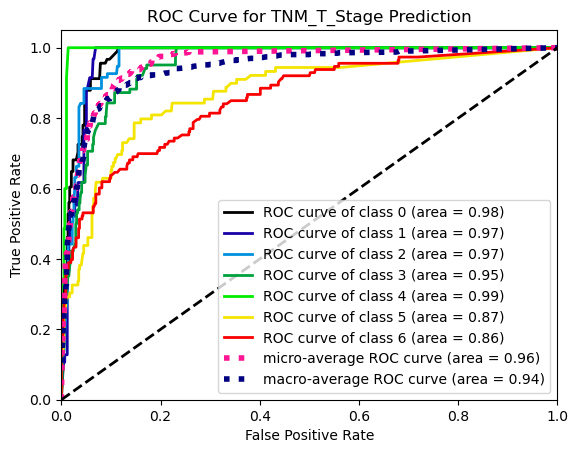

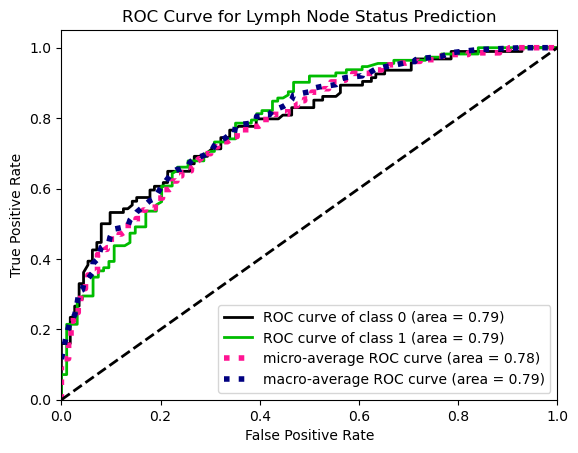

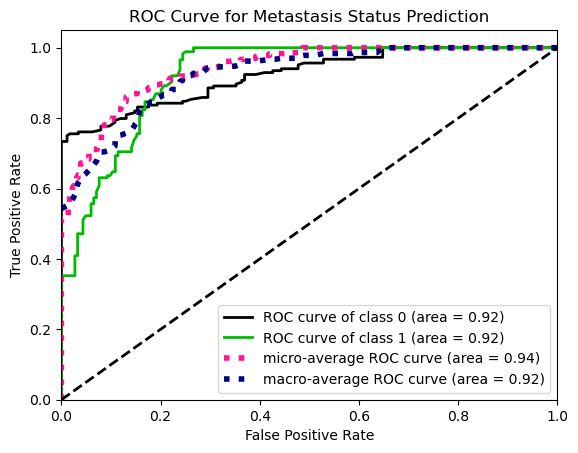

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        91
           1       0.85      1.00      0.92        94
           2       0.86      1.00      0.93        95
           3       0.77      0.93      0.84       102
           4       0.98      1.00      0.99       105
           5       0.67      0.67      0.67        89
           6       0.78      0.35      0.48       113

    accuracy                           0.83       689
   macro avg       0.82      0.84      0.82       689
weighted avg       0.82      0.83      0.81       689

              precision    recall  f1-score   support

           0       0.49      0.72      0.58        94
           1       0.61      0.36      0.45       112

    accuracy                           0.52       206
   macro avg       0.55      0.54      0.52       206
weighted avg       0.55      0.52      0.51       206

              precision    recall  f1-score   support

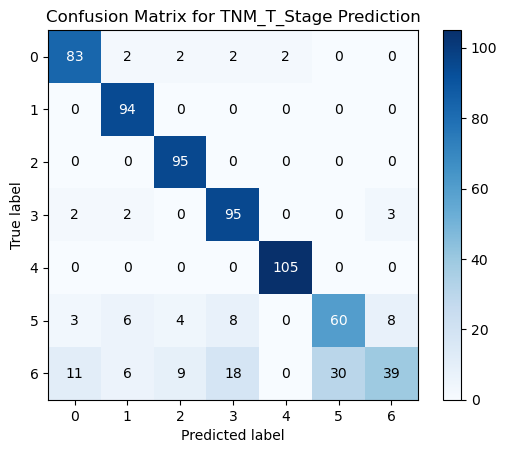

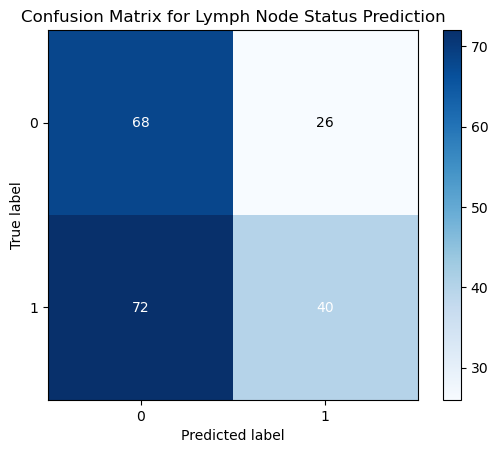

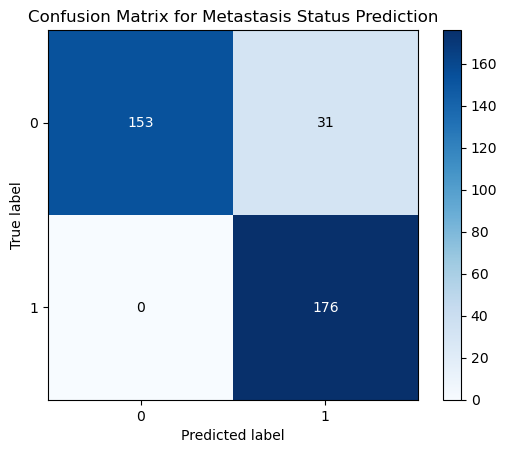

                   Type  Training Data  Validation Data  Actual Test Data  \
0           TNM_T_Stage              4                0                 4   
1           TNM_T_Stage              1                6                 2   
2           TNM_T_Stage              1                3                 5   
3           TNM_T_Stage              4                2                 2   
4           TNM_T_Stage              1                1                 3   
...                 ...            ...              ...               ...   
1250  Metastasis Status              1                0                 1   
1251  Metastasis Status              1                0                 1   
1252  Metastasis Status              0                0                 1   
1253  Metastasis Status              1                1                 1   
1254  Metastasis Status              1                1                 1   

      Predicted Test Data  Test Error  
0                       4          

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation']]

y_TNM_T_Stage = dataset['TNM_T_Stage'].values.ravel()
y_lymph_node_status = dataset['Lymph_Node_Status'].values.ravel()
y_metastasis = dataset['Metastasis_Status'].values.ravel()

# Oversampling to handle class imbalance
ros_ts = RandomOverSampler(random_state=0)
X_resampled_ts, y_TNM_T_Stage_resampled = ros_ts.fit_resample(X, y_TNM_T_Stage)

ros_ln = RandomOverSampler(random_state=0)
X_resampled_ln, y_lymph_node_status_resampled = ros_ln.fit_resample(X, y_lymph_node_status)

ros_ms = RandomOverSampler(random_state=0)
X_resampled_ms, y_metastasis_resampled = ros_ms.fit_resample(X, y_metastasis)

# 2. Data Splitting
X_trainval_ts, X_test_ts, y_trainval_ts, y_test_ts = train_test_split(X_resampled_ts, y_TNM_T_Stage_resampled, test_size=0.2, random_state=0)
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_trainval_ts, y_trainval_ts, test_size=0.25, random_state=0)

X_trainval_ln, X_test_ln, y_trainval_ln, y_test_ln = train_test_split(X_resampled_ln, y_lymph_node_status_resampled, test_size=0.2, random_state=0)
X_train_ln, X_val_ln, y_train_ln, y_val_ln = train_test_split(X_trainval_ln, y_trainval_ln, test_size=0.25, random_state=0)

X_trainval_ms, X_test_ms, y_trainval_ms, y_test_ms = train_test_split(X_resampled_ms, y_metastasis_resampled, test_size=0.2, random_state=0)
X_train_ms, X_val_ms, y_train_ms, y_val_ms = train_test_split(X_trainval_ms, y_trainval_ms, test_size=0.25, random_state=0)

# 3. Model Selection and Training
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_classifier_ts = DecisionTreeClassifier(random_state=0)
dt_classifier_ln = DecisionTreeClassifier(random_state=0)
dt_classifier_ms = DecisionTreeClassifier(random_state=0)

random_search_ts = RandomizedSearchCV(estimator=dt_classifier_ts, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_ln = RandomizedSearchCV(estimator=dt_classifier_ln, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_ms = RandomizedSearchCV(estimator=dt_classifier_ms, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

random_search_ts.fit(X_trainval_ts, y_trainval_ts)
random_search_ln.fit(X_trainval_ln, y_trainval_ln)
random_search_ms.fit(X_trainval_ms, y_trainval_ms)

best_dt_classifier_ts = random_search_ts.best_estimator_
best_dt_classifier_ln = random_search_ln.best_estimator_
best_dt_classifier_ms = random_search_ms.best_estimator_

y_pred_val_ts = best_dt_classifier_ts.predict(X_val_ts)
y_pred_val_ln = best_dt_classifier_ln.predict(X_val_ln)
y_pred_val_ms = best_dt_classifier_ms.predict(X_val_ms)

accuracy_val_ts = accuracy_score(y_val_ts, y_pred_val_ts)
accuracy_val_ln = accuracy_score(y_val_ln, y_pred_val_ln)
accuracy_val_ms = accuracy_score(y_val_ms, y_pred_val_ms)
print("Validation Accuracy for Tumor Size:", accuracy_val_ts)
print("Validation Accuracy for Lymph Node Status:", accuracy_val_ln)
print("Validation Accuracy for Metastasis Status:", accuracy_val_ms)

y_pred_test_ts = best_dt_classifier_ts.predict(X_test_ts)
y_pred_test_ln = best_dt_classifier_ln.predict(X_test_ln)
y_pred_test_ms = best_dt_classifier_ms.predict(X_test_ms)

accuracy_test_ts = accuracy_score(y_test_ts, y_pred_test_ts)
accuracy_test_ln = accuracy_score(y_test_ln, y_pred_test_ln)
accuracy_test_ms = accuracy_score(y_test_ms, y_pred_test_ms)

print("Test Accuracy for Tumor Size:", accuracy_test_ts)
print("Test Accuracy for Lymph Node Status:", accuracy_test_ln)
print("Test Accuracy for Metastasis Status:", accuracy_test_ms)

# 4. Results Presentation
results_ts = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_ts),
    'Training Data': pd.Series(y_trainval_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ts).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ts).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ts).reset_index(drop=True) - pd.Series(y_pred_test_ts).reset_index(drop=True)
})

results_ln = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_ln),
    'Training Data': pd.Series(y_trainval_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ln[:len(y_test_ln)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ln).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ln).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ln).reset_index(drop=True) - pd.Series(y_pred_test_ln).reset_index(drop=True)
})

results_ms = pd.DataFrame({
    'Type': ['Metastasis Status'] * len(y_test_ms),
    'Training Data': pd.Series(y_trainval_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ms).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ms).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ms).reset_index(drop=True) - pd.Series(y_pred_test_ms).reset_index(drop=True)
})

combined_results = pd.concat([results_ts, results_ln, results_ms], ignore_index=True)

# Calculate AUC scores
y_pred_proba_ts = best_rf_classifier_ts.predict_proba(X_test_ts)
auc_ts = roc_auc_score(y_test_ts, y_pred_proba_ts, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_ts)

# Calculate AUC score for Lymph node status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ln, y_pred_test_ln)
    print(f"AUC Score for Lymph Node Status Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ms, y_pred_test_ms)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Plot ROC Curves
skplt.metrics.plot_roc(y_test_ts, y_pred_proba_ts, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

y_pred_proba_ln = best_rf_classifier_ln.predict_proba(X_test_ln)
skplt.metrics.plot_roc(y_test_ln, y_pred_proba_ln, title='ROC Curve for Lymph Node Status Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_ms = best_rf_classifier_ms.predict_proba(X_test_ms)
skplt.metrics.plot_roc(y_test_ms, y_pred_proba_ms, title='ROC Curve for Metastasis Status Prediction')
plt.show()

print("Classification Report:")
print(classification_report(y_test_ts, y_pred_test_ts))
print(classification_report(y_test_ln, y_pred_test_ln))
print(classification_report(y_test_ms, y_pred_test_ms))

# Plot Confusion Matrices
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_ts, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ln, y_pred_test_ln, normalize=False, title='Confusion Matrix for Lymph Node Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ms, y_pred_test_ms, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

# Print combined results
print(combined_results)

# Save the data to a new CSV file (optional)
combined_results.to_csv('DT4_sampled_combined_TNM_result.csv', index=False)


In [69]:
import pandas as pd

y_cancer_stage= dataset['Cancer_Stage'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)
X_resampled_cs, y_cs_resampled = ros_cs.fit_resample(X, y_cancer_stage)

# Data Splitting
X_trainval_cs, X_test_cs, y_trainval_cs, y_test_cs = train_test_split(X_resampled_cs, y_cs_resampled, test_size=0.2, random_state=0)
X_train_cs, X_val_cs, y_train_cs, y_val_cs = train_test_split(X_trainval_cs, y_trainval_cs, test_size=0.25, random_state=0)

# Ensure y_pred_test_* and y_test_cs have the same length
min_length = min(len(y_pred_test_ts), len(y_pred_test_ln), len(y_pred_test_ms), len(y_test_cs))

# Initialize lists to store predicted and actual cancer stages
predicted_stages = []
actual_stages = []

# Loop through the predicted TNM values and match with dataset stages
for i in range(min_length):
    try:
        # Filter dataset based on predicted TNM values
        match = dataset[
            (dataset['TNM_T_Stage'] == y_pred_test_ts[i]) &
            (dataset['Lymph_Node_Status'] == y_pred_test_ln[i]) &
            (dataset['Metastasis_Status'] == y_pred_test_ms[i])
        ]

        # Check if there's a match and retrieve the cancer stage
        if not match.empty and match['Cancer_Stage'].values.size > 0:
            cancer_stage = match['Cancer_Stage'].values[0]  # Get the cancer stage
        else:
            cancer_stage = None  # No match found

        predicted_stages.append(cancer_stage)  # Store predicted stage
        actual_stages.append(y_test_cs[i])  # Store actual stage

    except IndexError as e:
        print(f"Index error at iteration {i}: {e}")
        predicted_stages.append(None)
        actual_stages.append(None)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Predicted Cancer Stage': predicted_stages,
    'Actual Test Cancer Stage': actual_stages
})

# Display the first few rows for verification
print(comparison_df.head())

# Save the results to a CSV file (optional)
comparison_df.to_csv('DT4_sampled_cancer_stages_from_predicted_TNM_results.csv', index=False)


   Predicted Cancer Stage  Actual Test Cancer Stage
0                     4.0                         3
1                     4.0                         4
2                     4.0                         0
3                     4.0                         1
4                     4.0                         4


In [70]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_auc_score, roc_curve
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'])
print(f"dt_Accuracy: {accuracy:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage']))

# Print confusion matrix
conf_matrix = confusion_matrix(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'])
print("Confusion Matrix:")
print(conf_matrix)
# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(comparison_df['Actual Test Cancer Stage'], comparison_df['Predicted Cancer Stage'], normalize=False, title='Confusion Matrix for DT(Cancer_Stage)')
plt.show()

# Binarize the cancer stages for AUC and ROC curve (One-vs-Rest approach)
unique_classes = np.unique(comparison_df['Actual Test Cancer Stage'])
y_true_bin = label_binarize(comparison_df['Actual Test Cancer Stage'], classes=unique_classes)
y_pred_bin = label_binarize(comparison_df['Predicted Cancer Stage'], classes=unique_classes)

# Calculate AUC score for each class
auc_scores = []
for i in range(y_true_bin.shape[1]):
    auc = roc_auc_score(y_true_bin[:, i], y_pred_bin[:, i])
    auc_scores.append(auc)
    # Calculate ROC curve points
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(fpr, tpr, label=f"Class {unique_classes[i]} (AUC = {auc:.2f})")

# Calculate and print average AUC
avg_auc = np.mean(auc_scores)
print(f"Average AUC Score: {avg_auc:.4f}")

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Cancer Stage Prediction')
plt.legend(loc='lower right')
plt.show()


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:25:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy for TNM_T_Stage (Voting Classifier): 0.764342453662842
Test Accuracy for TNM_T_Stage (Voting Classifier): 0.7161764705882353
Classification Report for TNM_T_Stage (Voting Classifier):
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       490
           1       0.70      0.95      0.81       500
           2       0.72      0.85      0.78       507
           3       0.71      0.64      0.67       510
           4       0.89      1.00      0.94       456
           5       0.56      0.38      0.45       479
           6       0.58      0.29      0.39       458

    accuracy                           0.72      3400
   macro avg       0.70      0.71      0.69      3400
weighted avg       0.70      0.72      0.69      3400



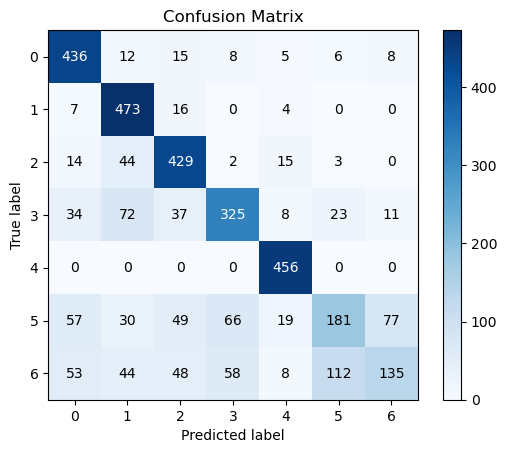

In [82]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Voting Classifier
voting_classifier_T = VotingClassifier(estimators=[
    ('xgb', model_T),  # XGBoost model for TNM_T_Stage
    ('rf', best_rf_classifier_ts),  # RandomForest model for TNM_T_Stage
    ('dt', best_dt_classifier_ts)  # DecisionTree model for TNM_T_Stage
], voting='hard')  # Use 'hard' voting for majority rule, or 'soft' for averaged probabilities

# Train the Voting Classifier
voting_classifier_T.fit(X_trainval_ts, y_trainval_ts)

# Predictions on validation set
y_pred_val_T = voting_classifier_T.predict(X_val_ts)

# Validation performance
accuracy_val_T = accuracy_score(y_val_ts, y_pred_val_T)
print(f"Validation Accuracy for TNM_T_Stage (Voting Classifier): {accuracy_val_T}")

# Predictions on test set
y_pred_test_T = voting_classifier_T.predict(X_test_ts)

# Test performance
accuracy_test_T = accuracy_score(y_test_ts, y_pred_test_T)
print(f"Test Accuracy for TNM_T_Stage (Voting Classifier): {accuracy_test_T}")

# Classification report and confusion matrix
print("Classification Report for TNM_T_Stage (Voting Classifier):")
print(classification_report(y_test_ts, y_pred_test_T))

# Confusion Matrix
cm = confusion_matrix(y_test_ts, y_pred_test_T)
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_T, normalize=False)
plt.show()


In [94]:
# Assuming you have the dataset loaded in `dataset`
X = sampled_data[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation']]

y_TNM_T_Stage = sampled_data['TNM_T_Stage'].values.ravel()
y_Lymph_Node_Status = sampled_data['Lymph_Node_Status'].values.ravel()
y_Metastasis_Status = sampled_data['Metastasis_Status'].values.ravel()

# Oversampling to handle class imbalance
ros_ts = RandomOverSampler(random_state=0)
X_resampled_ts, y_TNM_T_Stage_resampled = ros_ts.fit_resample(X, y_TNM_T_Stage)

ros_ln = RandomOverSampler(random_state=0)
X_resampled_ln, y_Lymph_Node_Status_resampled = ros_ln.fit_resample(X, y_Lymph_Node_Status)

ros_ms = RandomOverSampler(random_state=0)
X_resampled_ms, y_Metastasis_Status_resampled = ros_ms.fit_resample(X, y_Metastasis_Status)

# Splitting the dataset into train-validation-test sets for each target variable
def split_data(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Splitting for T, N, M stages
X_train_ts, X_val_ts, X_test_ts, y_train_ts, y_val_ts, y_test_ts = split_data(X_resampled_ts, y_TNM_T_Stage_resampled)
X_train_ln, X_val_ln, X_test_ln, y_train_ln, y_val_ln, y_test_ln = split_data(X_resampled_ln, y_Lymph_Node_Status_resampled)
X_train_ms, X_val_ms, X_test_ms, y_train_ms, y_val_ms, y_test_ms = split_data(X_resampled_ms, y_Metastasis_Status_resampled)


In [95]:
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train):
    model = XGBClassifier(
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=0
    )
    cv_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
    return cv_scores.mean()

param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

def bayesian_optimization_XGB(X_train, y_train):
    optimizer = BayesianOptimization(
        f=lambda max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree:
        xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train),
        pbounds=param_bounds,
        random_state=0
    )
    optimizer.maximize(init_points=5, n_iter=10)
    return optimizer.max['params']

best_params_XGB_ts = bayesian_optimization_XGB(X_train_ts, y_train_ts)
best_params_XGB_ln = bayesian_optimization_XGB(X_train_ln, y_train_ln)
best_params_XGB_ms = bayesian_optimization_XGB(X_train_ms, y_train_ms)


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.787     | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:32:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:32:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:32:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8035    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.6849    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.7856    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.6999    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:34:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8006    | 0.7931    | 0.1403    | 8.44      | 3.282     | 438.7     | 0.8272    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:35:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.7919    | 1.0       | 0.1376    | 9.933     | 5.594     | 416.0     | 0.7613    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8132    | 0.6       | 0.3       | 7.166     | 1.0       | 426.4     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.6046    | 0.7453    | 0.03135   | 3.802     | 1.121     | 457.0     | 0.7534    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:37:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:37:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:37:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.6994    | 0.7614    | 0.1616    | 9.816     | 9.398     | 248.4     | 0.6053    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:37:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:37:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:37:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.7493    | 0.6       | 0.3       | 10.0      | 10.0      | 430.4     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.7435    | 0.6       | 0.3       | 3.0       | 1.0       | 411.1     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.7449    | 0.8735    | 0.2413    | 3.0       | 1.0       | 279.2     | 0.9032    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.5319    | 1.0       | 0.01      | 3.0       | 1.0       | 433.7     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.8156    | 0.6557    | 0.2922    | 8.193     | 2.272     | 422.9     | 0.9471    |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.5       | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:39:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.5049    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.5064    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.5098    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.4919    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.4952    | 0.871     | 0.01616   | 8.821     | 6.759     | 237.2     | 0.8133    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.5033    | 0.8675    | 0.1639    | 4.312     | 5.717     | 282.8     | 0.6628    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.4871    | 1.0       | 0.3       | 10.0      | 10.0      | 289.4     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.4985    | 0.8494    | 0.03289   | 8.07      | 9.863     | 453.4     | 0.885     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.4968    | 0.8769    | 0.03248   | 4.905     | 6.402     | 387.6     | 0.771     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.4838    | 0.8082    | 0.06271   | 8.815     | 6.626     | 332.1     | 0.7609    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.5178    | 0.9589    | 0.2069    | 5.89      | 5.266     | 413.1     | 0.7571    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.4919    | 0.9116    | 0.07955   | 5.417     | 7.384     | 444.8     | 0.6642    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.513     | 0.906     | 0.03531   | 5.68      | 2.525     | 144.6     | 0.8146    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.4968    | 0.7681    | 0.1392    | 5.948     | 4.654     | 443.9     | 0.7825    |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.8404    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8516    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.7309    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8321    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7375    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8534    | 0.7935    | 0.1344    | 8.386     | 3.233     | 439.6     | 0.8278    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8376    | 0.8109    | 0.03175   | 9.393     | 2.324     | 439.9     | 0.666     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.7634    | 0.6787    | 0.3       | 3.975     | 7.457     | 434.8     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.8775    | 0.809     | 0.3       | 6.433     | 4.688     | 443.5     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8293    | 0.7211    | 0.3       | 9.832     | 8.656     | 443.8     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.8265    | 0.6       | 0.3       | 3.0       | 1.0       | 443.3     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.7458    | 1.0       | 0.01      | 6.618     | 4.413     | 448.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.6734    | 0.6       | 0.01      | 5.744     | 6.365     | 441.3     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8748    | 0.8864    | 0.3       | 6.732     | 3.93      | 444.1     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.8748    | 0.8716    | 0.3       | 7.583     | 3.553     | 442.6     | 1.0       |


In [96]:
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, X_train, y_train):
    rf_classifier = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features=max_features,
        random_state=0,
        class_weight='balanced'
    )
    rf_classifier.fit(X_train, y_train)
    return accuracy_score(y_train, rf_classifier.predict(X_train))

param_bounds_rf = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4),
    'max_features': (0.1, 1.0)
}

def bayesian_optimization_RF(X_train, y_train):
    optimizer = BayesianOptimization(
        f=lambda n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features:
        rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, X_train, y_train),
        pbounds=param_bounds_rf,
        random_state=0
    )
    optimizer.maximize(init_points=5, n_iter=10)
    return optimizer.max['params']

best_params_RF_ts = bayesian_optimization_RF(X_train_ts, y_train_ts)
best_params_RF_ln = bayesian_optimization_RF(X_train_ln, y_train_ln)
best_params_RF_ms = bayesian_optimization_RF(X_train_ms, y_train_ms)


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.8829    | 31.95     | 0.7437    | 2.808     | 6.359     | 269.5     |
| 2         | 0.8408    | 35.84     | 0.4938    | 3.675     | 9.709     | 253.4     |
| 3         | 0.8567    | 41.67     | 0.576     | 2.704     | 9.405     | 128.4     |
| 4         | 0.8417    | 13.49     | 0.1182    | 3.498     | 8.225     | 448.0     |
| 5         | 0.8664    | 49.14     | 0.8192    | 2.384     | 8.244     | 147.3     |
| 6         | 0.9342    | 26.3      | 0.2329    | 1.599     | 3.971     | 233.8     |
| 7         | 0.8892    | 48.9      | 0.9913    | 2.908     | 3.225     | 226.1     |
| 8         | 0.9342    | 49.15     | 0.7733    | 1.047     | 3.807     | 127.5     |
| 9         | 0.9342    | 26.31     | 0.2386    | 1.606     | 3.978     | 233.8     |
| 10        | 0.8509    | 28.91     | 0.6253    | 3.77

In [97]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_classifier_ts = DecisionTreeClassifier(random_state=0)
dt_classifier_ln = DecisionTreeClassifier(random_state=0)
dt_classifier_ms = DecisionTreeClassifier(random_state=0)

random_search_ts = RandomizedSearchCV(estimator=dt_classifier_ts, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=0)
random_search_ln = RandomizedSearchCV(estimator=dt_classifier_ln, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=0)
random_search_ms = RandomizedSearchCV(estimator=dt_classifier_ms, param_distributions=param_grid, n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=0)

random_search_ts.fit(X_trainval_ts, y_trainval_ts)
random_search_ln.fit(X_trainval_ln, y_trainval_ln)
random_search_ms.fit(X_trainval_ms, y_trainval_ms)

best_dt_classifier_ts = random_search_ts.best_estimator_
best_dt_classifier_ln = random_search_ln.best_estimator_
best_dt_classifier_ms = random_search_ms.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:58:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy for TNM_T_Stage (Voting Classifier): 0.7445573294629898
Test Accuracy for TNM_T_Stage (Voting Classifier): 0.7256894049346879
Confusion Matrix for TNM_T_Stage:


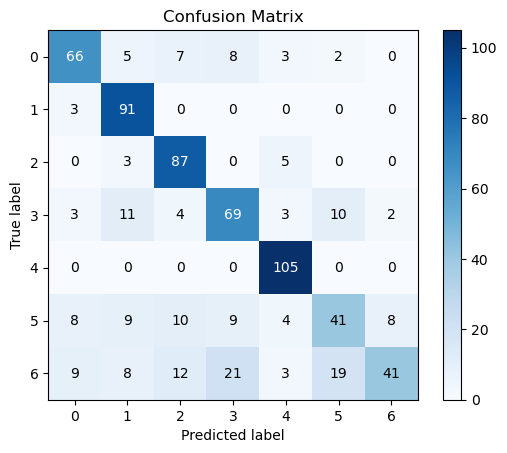

In [98]:
from sklearn.ensemble import VotingClassifier

# Create models for each classifier using best parameters
xgb_classifier_ts = XGBClassifier(
    max_depth=int(best_params_XGB_ts['max_depth']),
    learning_rate=best_params_XGB_ts['learning_rate'],
    n_estimators=int(best_params_XGB_ts['n_estimators']),
    min_child_weight=best_params_XGB_ts['min_child_weight'],
    subsample=best_params_XGB_ts['subsample'],
    colsample_bytree=best_params_XGB_ts['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)

rf_classifier_ts = RandomForestClassifier(
    n_estimators=int(best_params_RF_ts['n_estimators']),
    max_depth=int(best_params_RF_ts['max_depth']),
    min_samples_split=int(best_params_RF_ts['min_samples_split']),
    min_samples_leaf=int(best_params_RF_ts['min_samples_leaf']),
    max_features=best_params_RF_ts['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Voting Classifier for TNM_T_Stage
voting_classifier_T = VotingClassifier(estimators=[
    ('xgb', xgb_classifier_ts),
    ('rf', rf_classifier_ts),
    ('dt', best_dt_classifier_ts)
], voting='hard')

voting_classifier_T.fit(X_trainval_ts, y_trainval_ts)
y_pred_val_T = voting_classifier_T.predict(X_val_ts)

# Evaluation
accuracy_val_T = accuracy_score(y_val_ts, y_pred_val_T)
print(f"Validation Accuracy for TNM_T_Stage (Voting Classifier): {accuracy_val_T}")

y_pred_test_T = voting_classifier_T.predict(X_test_ts)
accuracy_test_T = accuracy_score(y_test_ts, y_pred_test_T)
print(f"Test Accuracy for TNM_T_Stage (Voting Classifier): {accuracy_test_T}")

# Confusion matrix
print("Confusion Matrix for TNM_T_Stage:")
cm = confusion_matrix(y_test_ts, y_pred_test_T)
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_T, normalize=False)
plt.show()




C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:03:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy for Lymph_Node_Status (Voting Classifier): 0.6941747572815534
Test Accuracy for Lymph_Node_Status (Voting Classifier): 0.6747572815533981
Confusion Matrix for Lymph_Node_Status:


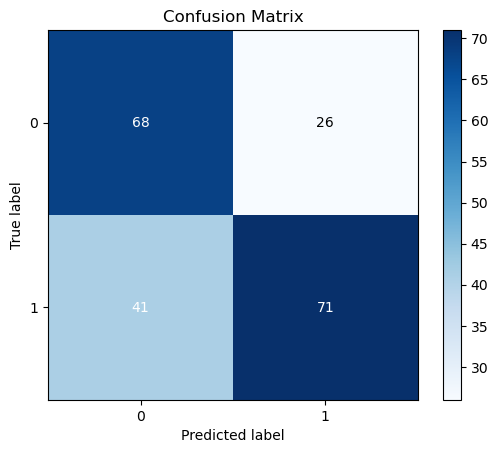

In [99]:
# Create models for Lymph Node Status using the best parameters from Bayesian Optimization
xgb_classifier_ln = XGBClassifier(
    max_depth=int(best_params_XGB_ln['max_depth']),
    learning_rate=best_params_XGB_ln['learning_rate'],
    n_estimators=int(best_params_XGB_ln['n_estimators']),
    min_child_weight=best_params_XGB_ln['min_child_weight'],
    subsample=best_params_XGB_ln['subsample'],
    colsample_bytree=best_params_XGB_ln['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)

rf_classifier_ln = RandomForestClassifier(
    n_estimators=int(best_params_RF_ln['n_estimators']),
    max_depth=int(best_params_RF_ln['max_depth']),
    min_samples_split=int(best_params_RF_ln['min_samples_split']),
    min_samples_leaf=int(best_params_RF_ln['min_samples_leaf']),
    max_features=best_params_RF_ln['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Voting Classifier for Lymph Node Status
voting_classifier_L = VotingClassifier(estimators=[
    ('xgb', xgb_classifier_ln),
    ('rf', rf_classifier_ln),
    ('dt', best_dt_classifier_ln)
], voting='hard')

# Train the Voting Classifier
voting_classifier_L.fit(X_trainval_ln, y_trainval_ln)

# Make predictions on the validation set
y_pred_val_L = voting_classifier_L.predict(X_val_ln)

# Evaluate the model
accuracy_val_L = accuracy_score(y_val_ln, y_pred_val_L)
print(f"Validation Accuracy for Lymph_Node_Status (Voting Classifier): {accuracy_val_L}")

# Predictions on the test set
y_pred_test_L = voting_classifier_L.predict(X_test_ln)
accuracy_test_L = accuracy_score(y_test_ln, y_pred_test_L)
print(f"Test Accuracy for Lymph_Node_Status (Voting Classifier): {accuracy_test_L}")

# Confusion matrix for Lymph Node Status
print("Confusion Matrix for Lymph_Node_Status:")
cm_ln = confusion_matrix(y_test_ln, y_pred_test_L)
skplt.metrics.plot_confusion_matrix(y_test_ln, y_pred_test_L, normalize=False)
plt.show()


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:04:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy for Metastasis_Status (Voting Classifier): 0.8638888888888889
Test Accuracy for Metastasis_Status (Voting Classifier): 0.8638888888888889
Confusion Matrix for Metastasis_Status:


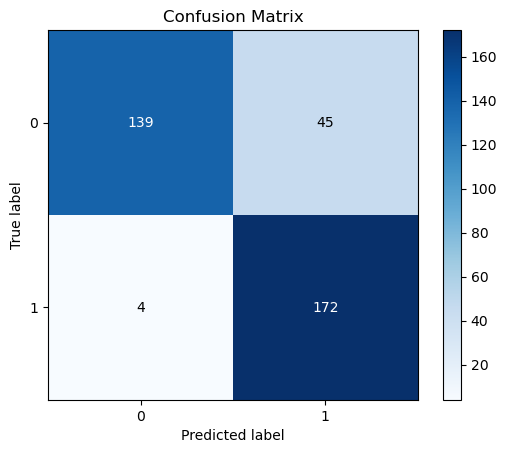

In [100]:
# Create models for Metastasis Status using the best parameters from Bayesian Optimization
xgb_classifier_ms = XGBClassifier(
    max_depth=int(best_params_XGB_ms['max_depth']),
    learning_rate=best_params_XGB_ms['learning_rate'],
    n_estimators=int(best_params_XGB_ms['n_estimators']),
    min_child_weight=best_params_XGB_ms['min_child_weight'],
    subsample=best_params_XGB_ms['subsample'],
    colsample_bytree=best_params_XGB_ms['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)

rf_classifier_ms = RandomForestClassifier(
    n_estimators=int(best_params_RF_ms['n_estimators']),
    max_depth=int(best_params_RF_ms['max_depth']),
    min_samples_split=int(best_params_RF_ms['min_samples_split']),
    min_samples_leaf=int(best_params_RF_ms['min_samples_leaf']),
    max_features=best_params_RF_ms['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Voting Classifier for Metastasis Status
voting_classifier_M = VotingClassifier(estimators=[
    ('xgb', xgb_classifier_ms),
    ('rf', rf_classifier_ms),
    ('dt', best_dt_classifier_ms)
], voting='hard')

# Train the Voting Classifier
voting_classifier_M.fit(X_trainval_ms, y_trainval_ms)

# Make predictions on the validation set
y_pred_val_M = voting_classifier_M.predict(X_val_ms)

# Evaluate the model
accuracy_val_M = accuracy_score(y_val_ms, y_pred_val_M)
print(f"Validation Accuracy for Metastasis_Status (Voting Classifier): {accuracy_val_M}")

# Predictions on the test set
y_pred_test_M = voting_classifier_M.predict(X_test_ms)
accuracy_test_M = accuracy_score(y_test_ms, y_pred_test_M)
print(f"Test Accuracy for Metastasis_Status (Voting Classifier): {accuracy_test_M}")

# Confusion matrix for Metastasis Status
print("Confusion Matrix for Metastasis_Status:")
cm_ms = confusion_matrix(y_test_ms, y_pred_test_M)
skplt.metrics.plot_confusion_matrix(y_test_ms, y_pred_test_M, normalize=False)
plt.show()


# Using the Predicted TNM Staging Processes to predict the Cancer Stages

In [108]:
import pandas as pd

# Create a list to store the predicted cancer stages
predicted_stages = []

# Get the minimum length of the predicted test sets
min_length = min(len(y_pred_test_ts), len(y_pred_test_ln), len(y_pred_test_ms))

# Loop through the predicted TNM values and find the corresponding cancer stage from the dataset
for i in range(min_length):
    # Filter the dataset based on the predicted TNM values
    match = sampled_data[
        (sampled_data['TNM_T_Stage'] == y_pred_test_ts[i]) &
        (sampled_data['Lymph_Node_Status'] == y_pred_test_ln[i]) &
        (sampled_data['Metastasis_Status'] == y_pred_test_ms[i])
    ]

    # Check if there's a match and retrieve the cancer stage
    if not match.empty:
        # Get unique cancer stages
        unique_stages = match['Cancer_Stage'].unique()
        if len(unique_stages) > 0:
            cancer_stage = unique_stages[0]  # Get the first unique stage
            predicted_stages.append(cancer_stage)
            print(f"Predicted TNM: T{y_pred_test_ts[i]} N{y_pred_test_ln[i]} M{y_pred_test_ms[i]} -> Cancer Stage: {cancer_stage}")
        else:
            predicted_stages.append(None)  # No valid cancer stage found
            print(f"Error: No valid Cancer Stage found for TNM: T{y_pred_test_ts[i]} N{y_pred_test_ln[i]} M{y_pred_test_ms[i]}")
    else:
        predicted_stages.append(None)  # No match found
        print(f"No matching cancer stage found for TNM: T{y_pred_test_ts[i]} N{y_pred_test_ln[i]} M{y_pred_test_ms[i]}")


Predicted TNM: T4 N0 M1 -> Cancer Stage: 4
Predicted TNM: T3 N0 M0 -> Cancer Stage: 1
Predicted TNM: T2 N1 M0 -> Cancer Stage: 2
Predicted TNM: T5 N1 M1 -> Cancer Stage: 4
Predicted TNM: T2 N0 M1 -> Cancer Stage: 4
Predicted TNM: T4 N0 M1 -> Cancer Stage: 4
Predicted TNM: T0 N1 M1 -> Cancer Stage: 0
Predicted TNM: T1 N1 M1 -> Cancer Stage: 4
Predicted TNM: T0 N1 M1 -> Cancer Stage: 0
Predicted TNM: T5 N1 M0 -> Cancer Stage: 2
Predicted TNM: T3 N0 M0 -> Cancer Stage: 1
Predicted TNM: T0 N1 M1 -> Cancer Stage: 0
Predicted TNM: T5 N0 M0 -> Cancer Stage: 2
Predicted TNM: T1 N1 M1 -> Cancer Stage: 4
Predicted TNM: T2 N1 M1 -> Cancer Stage: 4
Predicted TNM: T1 N1 M1 -> Cancer Stage: 4
Predicted TNM: T5 N1 M1 -> Cancer Stage: 4
Predicted TNM: T0 N0 M1 -> Cancer Stage: 0
Predicted TNM: T2 N0 M1 -> Cancer Stage: 4
Predicted TNM: T6 N0 M1 -> Cancer Stage: 4
Predicted TNM: T6 N1 M0 -> Cancer Stage: 2
Predicted TNM: T2 N0 M0 -> Cancer Stage: 1
Predicted TNM: T0 N1 M0 -> Cancer Stage: 0
Predicted T

In [110]:
print(f"Length of Predicted Stages: {len(predicted_stages)}")
print(f"Length of Actual Stages: {len(y_test_cs)}")


Length of Predicted Stages: 1027
Length of Actual Stages: 2752


In [111]:
no_match_count = 0
for i in range(min_length):
    # Existing match logic...
    if match.empty:
        no_match_count += 1
        # Optionally store something or handle differently
print(f"Number of predictions with no match: {no_match_count}")


Number of predictions with no match: 0


In [112]:
import pandas as pd

# Create lists to store predicted and actual cancer stages
predicted_stages = []
actual_stages = []

# Get the minimum length of the predicted test sets
min_length = min(len(y_pred_test_ts), len(y_pred_test_ln), len(y_pred_test_ms), len(y_test_cs))

# Loop through the predicted TNM values and find the corresponding cancer stage from the dataset
for i in range(min_length):
    # Filter the dataset based on the predicted TNM values
    match = sampled_data[
        (sampled_data['TNM_T_Stage'] == y_pred_test_ts[i]) &
        (sampled_data['Lymph_Node_Status'] == y_pred_test_ln[i]) &
        (sampled_data['Metastasis_Status'] == y_pred_test_ms[i])
    ]

    # Check if there's a match and retrieve the cancer stage
    if not match.empty:
        cancer_stage = match['Cancer_Stage'].values[0]  # Get the first value
        predicted_stages.append(cancer_stage)
    else:
        predicted_stages.append(None)  # Append None if no match found

    # Append the actual cancer stage from y_test_cs
    actual_stages.append(y_test_cs[i])  # This should match in length

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Predicted Cancer Stage': predicted_stages,
    'Actual Cancer Stage': actual_stages
})

# Drop rows with NaN values
comparison_df.dropna(inplace=True)

# Print lengths after processing
print(f"Length of Predicted Stages after filtering: {len(comparison_df['Predicted Cancer Stage'])}")
print(f"Length of Actual Stages after filtering: {len(comparison_df['Actual Cancer Stage'])}")

# Check if both lengths are equal now
if len(comparison_df['Predicted Cancer Stage']) == len(comparison_df['Actual Cancer Stage']):
    # Calculate accuracy
    accuracy = accuracy_score(comparison_df['Actual Cancer Stage'], comparison_df['Predicted Cancer Stage'])
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(comparison_df['Actual Cancer Stage'], comparison_df['Predicted Cancer Stage']))

    # Print confusion matrix
    conf_matrix = confusion_matrix(comparison_df['Actual Cancer Stage'], comparison_df['Predicted Cancer Stage'])
    print("Confusion Matrix:")
    print(conf_matrix)
else:
    print("Length mismatch after filtering. Check your data and predictions.")


Length of Predicted Stages after filtering: 979
Length of Actual Stages after filtering: 979
Accuracy: 0.1951
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.15      0.16       195
           1       0.20      0.14      0.16       197
           2       0.19      0.16      0.17       182
           3       0.09      0.01      0.02       205
           4       0.21      0.52      0.30       200

    accuracy                           0.20       979
   macro avg       0.17      0.19      0.16       979
weighted avg       0.17      0.20      0.16       979

Confusion Matrix:
[[ 29  36  33   8  89]
 [ 33  27  27   5 105]
 [ 39  25  29   5  84]
 [ 35  25  35   2 108]
 [ 43  20  30   3 104]]


In [32]:
# Check if all target columns have the same number of rows as X
print(len(X), len(y_TNM_T_Stage), len(y_lymph_node_status), len(y_metastasis), len(dataset['Cancer_Stage']))


5000 5000 5000 5000 5000


In [38]:

# Convert the list of predicted stages to a numpy array for further evaluation
y_pred_cancer_stages = np.array(cancer_stage)

In [60]:
# Check the shape of the predicted cancer stages
print("Shape of predicted cancer stages:", y_pred_cancer_stages.shape)


Shape of predicted cancer stages: ()


In [45]:
y_Cancer_Stage = dataset['Cancer_Stage'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)
X_resampled_cs, y_Cancer_Stage_resampled = ros_ts.fit_resample(X, y_Cancer_Stage)

# 2. Data Splitting
X_trainval_cs, X_test_cs, y_trainval_cs, y_test_cs = train_test_split(X_resampled_cs, y_Cancer_Stage_resampled, test_size=0.2, random_state=0)
X_train_cs, X_val_cs, y_train_cs, y_val_cs = train_test_split(X_trainval_cs, y_trainval_cs, test_size=0.25, random_state=0)


In [52]:
combined_results.head()

,Type,Training Data,Validation Data,Actual Test Data,Predicted Test Data,Test Error
0,TNM_T_Stage,6,5.0,4,4,0
1,TNM_T_Stage,5,2.0,3,3,0
2,TNM_T_Stage,1,6.0,1,2,-1
3,TNM_T_Stage,6,4.0,6,5,1
4,TNM_T_Stage,6,1.0,2,2,0


In [55]:
# Ensure 'combined_results' contains the columns you want to merge
print(combined_results.columns)  # Check the columns in combined_results

# Ensure 'dataset' has the correct columns
print(dataset.columns)  # Check the columns in dataset



Index(['Type', 'Training Data', 'Validation Data', 'Actual Test Data',
       'Predicted Test Data', 'Test Error'],
      dtype='object')
Index(['Age', 'Alcohol_Intake', 'Smoking_Status',
       'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Tumor_Size_mm',
       'Lymph_Node_Status', 'Breast_Pain', 'Breast_Lump', 'Breast_Biopsy',
       'Genetic_Mutation', 'Hormone_Receptor_Status', 'Diagnosis_Status',
       'Metastasis_Status', 'Cancer_Stage', 'Treatment', 'TNM_T_Stage'],
      dtype='object')


In [53]:
print(f"Length of predicted TNM stages: {len(y_pred_test_ts)}")
print(f"Length of predicted lymph node status: {len(y_pred_test_ln)}")
print(f"Length of predicted metastasis status: {len(y_pred_test_ms)}")
print(f"Length of actual test data: {len(y_test_cs)}")


Length of predicted TNM stages: 3400
Length of predicted lymph node status: 1027
Length of predicted metastasis status: 1799
Length of actual test data: 2752
